In [ ]:
#Importing relevant Python libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

('liu', '888', 'bin', 'liu', '888', 'bin')
{'one': 1, 'two': 2}
dict_values([1, 2])


/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
#A function for converting the energy data format from an .xvg file to a dataframe.
#Input: the path to the .xvg file.
#Output: the converted dataframe.

def Generate_Interaction_Energies_df(file_name):
    
    #Loading the data from the .xvg file
    y = np.loadtxt(file_name, comments = ['@', '#'], unpack = True)
    lists = []
    for i in range(len(y)):
        lists.append(list(y[i]))

    #Transferring the data to a specified dataframe (via an intermediate dictionary), whose columns correspond to the different energy terms
    d = {}
    for i in range(len(lists)):
        d[i] = lists[i]
    df = pd.DataFrame(d)
    df.set_index(0, inplace=True)
    if len(df.columns) == 4:
        df.columns = ['Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14']
    elif len(df.columns) == 12:
        df.columns = ['PP Coul-SR', 'PP LJ-SR', 'PP Coul-14', 'PP LJ-14', 'Coul-SR', 'LJ-SR', 'Coul-14', 'LJ-14', 'DD Coul-SR', 'DD LJ-SR', 'DD Coul-14', 'DD LJ-14']
    
    #Returning the dataframe
    return df

#A function for converting all .xvg files (six in total, three for A-DNA copies and three for B-DNA copies) to specified dataframes (using the Generate_Interaction_Energies_df function).
#Input: a list containing the paths to the .xvg files.
#Output: the converted dataframes.

def from_files_to_dfs_copies(six_files_list):

    #Converting each .xvg file to a specified dataframe
    df1 = Generate_Interaction_Energies_df(six_files_list[0])
    df2 = Generate_Interaction_Energies_df(six_files_list[1])
    df3 = Generate_Interaction_Energies_df(six_files_list[2])
    df4 = Generate_Interaction_Energies_df(six_files_list[3])
    df5 = Generate_Interaction_Energies_df(six_files_list[4])
    df6 = Generate_Interaction_Energies_df(six_files_list[5])

    #Returning all dataframes
    return df1, df2, df3, df4, df5, df6

In [ ]:
#Reading all .xvg files - 10 peptide types, each placed against either the minor or major groove of either an A-DNA or a B-DNA
dfs_list = []

#SPECIFY YOUR OWN PATH FOR SAVING ALL PLOTS
output_path = '/home_b/yoav' #REPLACE THE WRITTEN PATH WITH YOUR OWN PATH

#SPECIFY THE PATHS TO THE DATA FILES IN THEIR RESPECTIVE LOCATIONS, AS INDICATED BELOW

#Reading the data of polyVal, placed against the minor groove of either A-DNA or B-DNA
Val_1000_files = ["/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ValX_posres/A_DNA_20_AVX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres/B_DNA_20_AVX6_mod_gmx_1000ns_III_energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Val_I, B_Val_I, A_Val_II, B_Val_II, A_Val_III, B_Val_III = from_files_to_dfs_copies(Val_1000_files)
dfs_list.append([A_Val_I, B_Val_I, A_Val_II, B_Val_II, A_Val_III, B_Val_III])

#Reading the data of polyTyr, placed against the minor groove of either A-DNA or B-DNA
Tyr_1000_files = ["/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.I.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.I.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.II.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.II.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_TyrX_posres/A_DNA_20_AYX6.1000ns.III.energy.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres/B_DNA_20_AYX6.1000ns.III.energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Tyr_I, B_Tyr_I, A_Tyr_II, B_Tyr_II, A_Tyr_III, B_Tyr_III = from_files_to_dfs_copies(Tyr_1000_files)
dfs_list.append([A_Tyr_I, B_Tyr_I, A_Tyr_II, B_Tyr_II, A_Tyr_III, B_Tyr_III])

#Reading the data of polyLys, placed against the minor groove of either A-DNA or B-DNA
Lys_1000_files = ["/home_b/yoav/A_DNA_Ala_LysX_posres/A_DNA_20_AKX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres/B_DNA_20_AKX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_LysX_posres/A_DNA_20_AKX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres/B_DNA_20_AKX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_LysX_posres/A_DNA_20_AKX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres/B_DNA_20_AKX6_mod_gmx_1000ns_III_energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Lys_I, B_Lys_I, A_Lys_II, B_Lys_II, A_Lys_III, B_Lys_III = from_files_to_dfs_copies(Lys_1000_files)
dfs_list.append([A_Lys_I, B_Lys_I, A_Lys_II, B_Lys_II, A_Lys_III, B_Lys_III])

#Reading the data of polyArg, placed against the minor groove of either A-DNA or B-DNA
Arg_1000_files = ["/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_ArgX_posres/A_DNA_20_ARX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres/TAX10_B_DNA_ARX6_mod_gmx_1000ns_III_energy.xvg",]#PLACE THE SIX ENERGY FILES HERE
A_Arg_I, B_Arg_I, A_Arg_II, B_Arg_II, A_Arg_III, B_Arg_III = from_files_to_dfs_copies(Arg_1000_files)
dfs_list.append([A_Arg_I, B_Arg_I, A_Arg_II, B_Arg_II, A_Arg_III, B_Arg_III])

#Reading the data of polyAsp, placed against the minor groove of either A-DNA or B-DNA
Asp_1000_files = ["/home_b/yoav/A_DNA_Ala_AspX_posres/A_DNA_20_ADX6_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres/B_DNA_20_ADX6_energy_I.xvg",
                 "/home_b/yoav/A_DNA_Ala_AspX_posres/A_DNA_20_ADX6_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres/B_DNA_20_ADX6_energy_II.xvg",
                 "/home_b/yoav/A_DNA_Ala_AspX_posres/A_DNA_20_ADX6_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres/B_DNA_20_ADX6_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Asp_I, B_Asp_I, A_Asp_II, B_Asp_II, A_Asp_III, B_Asp_III = from_files_to_dfs_copies(Asp_1000_files)
dfs_list.append([A_Asp_I, B_Asp_I, A_Asp_II, B_Asp_II, A_Asp_III, B_Asp_III])

#Reading the data of polyAsn, placed against the minor groove of either A-DNA or B-DNA
Asn_1000_files = ["/home_b/yoav/A_DNA_Ala_AsnX_posres/A_DNA_20_ANX6.1000ns.I.energy.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres/B_DNA_20_ANX6.1000ns.I.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_AsnX_posres/A_DNA_20_ANX6.1000ns.II.energy.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres/B_DNA_20_ANX6.1000ns.II.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_AsnX_posres/A_DNA_20_ANX6.1000ns.III.energy.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres/B_DNA_20_ANX6.1000ns.III.energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Asn_I, B_Asn_I, A_Asn_II, B_Asn_II, A_Asn_III, B_Asn_III = from_files_to_dfs_copies(Asn_1000_files)
dfs_list.append([A_Asn_I, B_Asn_I, A_Asn_II, B_Asn_II, A_Asn_III, B_Asn_III])

#Reading the data of polySer, placed against the minor groove of either A-DNA or B-DNA
Ser_1000_files = ["/home_b/yoav/A_DNA_Ala_SerX_posres/A_DNA_20_ASX6.1000ns.I.energy.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres/B_DNA_20_ASX6.1000ns.I.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_SerX_posres/A_DNA_20_ASX6.1000ns.II.energy.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres/B_DNA_20_ASX6.1000ns.II.energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_SerX_posres/A_DNA_20_ASX6.1000ns.III.energy.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres/B_DNA_20_ASX6.1000ns.III.energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Ser_I, B_Ser_I, A_Ser_II, B_Ser_II, A_Ser_III, B_Ser_III = from_files_to_dfs_copies(Ser_1000_files)
dfs_list.append([A_Ser_I, B_Ser_I, A_Ser_II, B_Ser_II, A_Ser_III, B_Ser_III])

#Reading the data of polyGly, placed against the minor groove of either A-DNA or B-DNA
Gly_1000_files = ["/home_b/yoav/A_DNA_Ala_GlyX_posres/TAX10_A_DNA_AGX6_mod_gmx_1000ns_I_energy.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres/TAX10_B_DNA_AGX6_mod_gmx_1000ns_I_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_GlyX_posres/TAX10_A_DNA_AGX6_mod_gmx_1000ns_II_energy.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres/TAX10_B_DNA_AGX6_mod_gmx_1000ns_II_energy.xvg",
                 "/home_b/yoav/A_DNA_Ala_GlyX_posres/TAX10_A_DNA_AGX6_mod_gmx_1000ns_III_energy.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres/TAX10_B_DNA_AGX6_mod_gmx_1000ns_III_energy.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Gly_I, B_Gly_I, A_Gly_II, B_Gly_II, A_Gly_III, B_Gly_III = from_files_to_dfs_copies(Gly_1000_files)
dfs_list.append([A_Gly_I, B_Gly_I, A_Gly_II, B_Gly_II, A_Gly_III, B_Gly_III])

#Reading the data of polyPro, placed against the minor groove of either A-DNA or B-DNA
Pro_1000_files = ["/home_b/yoav/A_DNA_Ala_ProX_posres/A_DNA_20_APX6_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres/B_DNA_20_APX6_energy_I.xvg",
                 "/home_b/yoav/A_DNA_Ala_ProX_posres/A_DNA_20_APX6_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres/B_DNA_20_APX6_energy_II.xvg",
                 "/home_b/yoav/A_DNA_Ala_ProX_posres/A_DNA_20_APX6_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres/B_DNA_20_APX6_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Pro_I, B_Pro_I, A_Pro_II, B_Pro_II, A_Pro_III, B_Pro_III = from_files_to_dfs_copies(Pro_1000_files)
dfs_list.append([A_Pro_I, B_Pro_I, A_Pro_II, B_Pro_II, A_Pro_III, B_Pro_III])

#Reading the data of poly(Asn-Val), placed against the minor groove of either A-DNA or B-DNA
NV_1000_files = ["/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_I.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_I.xvg",
                 "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_II.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_II.xvg",
                 "/home_b/yoav/A_DNA_NV_X6_posres/A_DNA_20_NVX6_energy_III.xvg", "/home_b/yoav/B_DNA_NV_X6_posres/B_DNA_20_NVX6_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_NV_I, B_NV_I, A_NV_II, B_NV_II, A_NV_III, B_NV_III = from_files_to_dfs_copies(NV_1000_files)
dfs_list.append([A_NV_I, B_NV_I, A_NV_II, B_NV_II, A_NV_III, B_NV_III])

#Reading the data of polyVal, placed against the major groove of either A-DNA or B-DNA
Val_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_ValX_posres_Major_Groove/A_DNA_20_AVX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres_Major_Groove/B_DNA_20_AVX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_ValX_posres_Major_Groove/A_DNA_20_AVX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres_Major_Groove/B_DNA_20_AVX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_ValX_posres_Major_Groove/A_DNA_20_AVX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_ValX_posres_Major_Groove/B_DNA_20_AVX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Val_MG_I, B_Val_MG_I, A_Val_MG_II, B_Val_MG_II, A_Val_MG_III, B_Val_MG_III = from_files_to_dfs_copies(Val_1000_MG_files)
dfs_list.append([A_Val_MG_I, B_Val_MG_I, A_Val_MG_II, B_Val_MG_II, A_Val_MG_III, B_Val_MG_III])

#Reading the data of polyTyr, placed against the major groove of either A-DNA or B-DNA
Tyr_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_TyrX_posres_Major_Groove/A_DNA_20_AYX6_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres_Major_Groove/B_DNA_20_AYX6_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_TyrX_posres_Major_Groove/A_DNA_20_AYX6_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres_Major_Groove/B_DNA_20_AYX6_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_TyrX_posres_Major_Groove/A_DNA_20_AYX6_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_TyrX_posres_Major_Groove/B_DNA_20_AYX6_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Tyr_MG_I, B_Tyr_MG_I, A_Tyr_MG_II, B_Tyr_MG_II, A_Tyr_MG_III, B_Tyr_MG_III = from_files_to_dfs_copies(Tyr_1000_MG_files)
dfs_list.append([A_Tyr_MG_I, B_Tyr_MG_I, A_Tyr_MG_II, B_Tyr_MG_II, A_Tyr_MG_III, B_Tyr_MG_III])

#Reading the data of polyLys, placed against the major groove of either A-DNA or B-DNA
Lys_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_LysX_posres_Major_Groove/A_DNA_20_AKX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres_Major_Groove/B_DNA_20_AKX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_LysX_posres_Major_Groove/A_DNA_20_AKX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres_Major_Groove/B_DNA_20_AKX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_LysX_posres_Major_Groove/A_DNA_20_AKX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_LysX_posres_Major_Groove/B_DNA_20_AKX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Lys_MG_I, B_Lys_MG_I, A_Lys_MG_II, B_Lys_MG_II, A_Lys_MG_III, B_Lys_MG_III = from_files_to_dfs_copies(Lys_1000_MG_files)
dfs_list.append([A_Lys_MG_I, B_Lys_MG_I, A_Lys_MG_II, B_Lys_MG_II, A_Lys_MG_III, B_Lys_MG_III])

#Reading the data of polyArg, placed against the major groove of either A-DNA or B-DNA
Arg_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_ArgX_posres_Major_Groove/A_DNA_20_ARX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres_Major_Groove/B_DNA_ARX6_Major_Groove_Energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_ArgX_posres_Major_Groove/A_DNA_20_ARX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres_Major_Groove/B_DNA_ARX6_Major_Groove_Energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_ArgX_posres_Major_Groove/A_DNA_20_ARX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_ArgX_posres_Major_Groove/B_DNA_ARX6_Major_Groove_Energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Arg_MG_I, B_Arg_MG_I, A_Arg_MG_II, B_Arg_MG_II, A_Arg_MG_III, B_Arg_MG_III = from_files_to_dfs_copies(Arg_1000_MG_files)
dfs_list.append([A_Arg_MG_I, B_Arg_MG_I, A_Arg_MG_II, B_Arg_MG_II, A_Arg_MG_III, B_Arg_MG_III])

#Reading the data of polyAsp, placed against the major groove of either A-DNA or B-DNA
Asp_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_AspX_posres_Major_Groove/A_DNA_20_ADX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres_Major_Groove/B_DNA_20_ADX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_AspX_posres_Major_Groove/A_DNA_20_ADX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres_Major_Groove/B_DNA_20_ADX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_AspX_posres_Major_Groove/A_DNA_20_ADX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_AspX_posres_Major_Groove/B_DNA_20_ADX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Asp_MG_I, B_Asp_MG_I, A_Asp_MG_II, B_Asp_MG_II, A_Asp_MG_III, B_Asp_MG_III = from_files_to_dfs_copies(Asp_1000_MG_files)
dfs_list.append([A_Asp_MG_I, B_Asp_MG_I, A_Asp_MG_II, B_Asp_MG_II, A_Asp_MG_III, B_Asp_MG_III])    

#Reading the data of polyAsn, placed against the major groove of either A-DNA or B-DNA
Asn_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_AsnX_posres_Major_Groove/A_DNA_20_ANX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres_Major_Groove/B_DNA_20_ANX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_AsnX_posres_Major_Groove/A_DNA_20_ANX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres_Major_Groove/B_DNA_20_ANX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_AsnX_posres_Major_Groove/A_DNA_20_ANX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_AsnX_posres_Major_Groove/B_DNA_20_ANX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Asn_MG_I, B_Asn_MG_I, A_Asn_MG_II, B_Asn_MG_II, A_Asn_MG_III, B_Asn_MG_III = from_files_to_dfs_copies(Asn_1000_MG_files)
dfs_list.append([A_Asn_MG_I, B_Asn_MG_I, A_Asn_MG_II, B_Asn_MG_II, A_Asn_MG_III, B_Asn_MG_III])

#Reading the data of polySer, placed against the major groove of either A-DNA or B-DNA
Ser_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_SerX_posres_Major_Groove/A_DNA_20_ASX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres_Major_Groove/B_DNA_20_ASX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_SerX_posres_Major_Groove/A_DNA_20_ASX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres_Major_Groove/B_DNA_20_ASX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_SerX_posres_Major_Groove/A_DNA_20_ASX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_SerX_posres_Major_Groove/B_DNA_20_ASX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Ser_MG_I, B_Ser_MG_I, A_Ser_MG_II, B_Ser_MG_II, A_Ser_MG_III, B_Ser_MG_III = from_files_to_dfs_copies(Ser_1000_MG_files)
dfs_list.append([A_Ser_MG_I, B_Ser_MG_I, A_Ser_MG_II, B_Ser_MG_II, A_Ser_MG_III, B_Ser_MG_III])

#Reading the data of polyGly, placed against the major groove of either A-DNA or B-DNA
Gly_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_GlyX_posres_Major_Groove/A_DNA_20_AGX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres_Major_Groove/B_DNA_20_AGX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_GlyX_posres_Major_Groove/A_DNA_20_AGX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres_Major_Groove/B_DNA_20_AGX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_GlyX_posres_Major_Groove/A_DNA_20_AGX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_GlyX_posres_Major_Groove/B_DNA_20_AGX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Gly_MG_I, B_Gly_MG_I, A_Gly_MG_II, B_Gly_MG_II, A_Gly_MG_III, B_Gly_MG_III = from_files_to_dfs_copies(Gly_1000_MG_files)
dfs_list.append([A_Gly_MG_I, B_Gly_MG_I, A_Gly_MG_II, B_Gly_MG_II, A_Gly_MG_III, B_Gly_MG_III])

#Reading the data of polyPro, placed against the major groove of either A-DNA or B-DNA
Pro_1000_MG_files = ["/home_b/yoav/A_DNA_Ala_ProX_posres_Major_Groove/A_DNA_20_APX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres_Major_Groove/B_DNA_20_APX6_Major_Groove_energy_I.xvg",
                     "/home_b/yoav/A_DNA_Ala_ProX_posres_Major_Groove/A_DNA_20_APX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres_Major_Groove/B_DNA_20_APX6_Major_Groove_energy_II.xvg",
                     "/home_b/yoav/A_DNA_Ala_ProX_posres_Major_Groove/A_DNA_20_APX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_Ala_ProX_posres_Major_Groove/B_DNA_20_APX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_Pro_MG_I, B_Pro_MG_I, A_Pro_MG_II, B_Pro_MG_II, A_Pro_MG_III, B_Pro_MG_III = from_files_to_dfs_copies(Pro_1000_MG_files)
dfs_list.append([A_Pro_MG_I, B_Pro_MG_I, A_Pro_MG_II, B_Pro_MG_II, A_Pro_MG_III, B_Pro_MG_III])

#Reading the data of poly(Asn-Val), placed against the major groove of either A-DNA or B-DNA
NV_1000_MG_files = ["/home_b/yoav/A_DNA_NV_X6_Major_Groove_posres/TAX10_A_DNA_NVX6_Major_Groove_energy_I.xvg", "/home_b/yoav/B_DNA_NV_X6_Major_Groove_posres/TAX10_B_DNA_NVX6_Major_Groove_energy_I.xvg",
                    "/home_b/yoav/A_DNA_NV_X6_Major_Groove_posres/TAX10_A_DNA_NVX6_Major_Groove_energy_II.xvg", "/home_b/yoav/B_DNA_NV_X6_Major_Groove_posres/TAX10_B_DNA_NVX6_Major_Groove_energy_II.xvg",
                    "/home_b/yoav/A_DNA_NV_X6_Major_Groove_posres/TAX10_A_DNA_NVX6_Major_Groove_energy_III.xvg", "/home_b/yoav/B_DNA_NV_X6_Major_Groove_posres/TAX10_B_DNA_NVX6_Major_Groove_energy_III.xvg"]#PLACE THE SIX ENERGY FILES HERE
A_NV_MG_I, B_NV_MG_I, A_NV_MG_II, B_NV_MG_II, A_NV_MG_III, B_NV_MG_III = from_files_to_dfs_copies(NV_1000_MG_files)
dfs_list.append([A_NV_MG_I, B_NV_MG_I, A_NV_MG_II, B_NV_MG_II, A_NV_MG_III, B_NV_MG_III])

In [ ]:
#Unifying the copies of each DNA (A-DNA or B-DNA) to one dataframe (for each peptide)
unified_dfs_A = []; unified_dfs_B = []
copy_number = 3

for df_list in dfs_list:
    curr_unified_df_A = pd.DataFrame(columns = df_list[0].columns)
    curr_unified_df_B = pd.DataFrame(columns = df_list[1].columns)

    for i in range(0, (copy_number * 2 - 1), 2):
        curr_unified_df_A = pd.concat([curr_unified_df_A, df_list[i]], axis = 0, ignore_index = True)
        curr_unified_df_B = pd.concat([curr_unified_df_B, df_list[i + 1]], axis = 0, ignore_index = True)
    
    unified_dfs_A.append(curr_unified_df_A)
    unified_dfs_B.append(curr_unified_df_B)

/tmp/ipykernel_3827304/1058013572.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  curr_unified_df_A = pd.concat([curr_unified_df_A, df_list[i]], axis = 0, ignore_index = True)
/tmp/ipykernel_3827304/1058013572.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  curr_unified_df_B = pd.concat([curr_unified_df_B, df_list[i + 1]], axis = 0, ignore_index = True)
/tmp/ipykernel_3827304/1058013572.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprec

In [6]:
#Calculating the means and standard deviations of the relevant energy term (summed Coulomb and Lennard-Jones (LJ)) across all unified dataframes
unified_means_A = []; unified_means_B = []
unified_stds_A = []; unified_stds_B = []

for unified_df_A in unified_dfs_A:
    unified_df_A['Sum_Coul_LJ_SR'] = unified_df_A['Coul-SR'] + unified_df_A['LJ-SR']
    unified_means_A.append(np.mean(unified_df_A['Sum_Coul_LJ_SR']))
    unified_stds_A.append(np.std(unified_df_A['Sum_Coul_LJ_SR']))

for unified_df_B in unified_dfs_B:
    unified_df_B['Sum_Coul_LJ_SR'] = unified_df_B['Coul-SR'] + unified_df_B['LJ-SR']
    unified_means_B.append(np.mean(unified_df_B['Sum_Coul_LJ_SR']))
    unified_stds_B.append(np.std(unified_df_B['Sum_Coul_LJ_SR']))

In [ ]:
#Splitting the data to separated replicates (for each peptide,either for A-DNA or for B-DNA)

A_replicates = []; B_replicates = []
for i_df_list, df_list in enumerate(dfs_list):
    curr_A_replicates = []; curr_B_replicates = []
    if 1:
        for j in range(0, len(df_list) - 1, 2):
            curr_A_replicate = df_list[j].copy()
            curr_A_replicate['Sum_Coul_LJ_SR'] = curr_A_replicate['Coul-SR'] + curr_A_replicate['LJ-SR']
            curr_B_replicate = df_list[j + 1].copy()
            curr_B_replicate['Sum_Coul_LJ_SR'] = curr_B_replicate['Coul-SR'] + curr_B_replicate['LJ-SR'] 
        
            curr_A_replicates.append(curr_A_replicate)
            curr_B_replicates.append(curr_B_replicate)
        A_replicates.append(curr_A_replicates)
        B_replicates.append(curr_B_replicates)

In [8]:
#Filtering out the first 10% frames of each simulation (100 ns - 100,000 ps)
res_thres = 100000
A_replicates_restricted = []; B_replicates_restricted = []

for curr_A_replicates in A_replicates:
    curr_A_replicates_restricted = []
    for x in curr_A_replicates:
        curr_A_replicates_restricted.append(x.copy()[res_thres:].reset_index())
    A_replicates_restricted.append(curr_A_replicates_restricted)

for curr_B_replicates in B_replicates:
    curr_B_replicates_restricted = []
    for x in curr_B_replicates:
        curr_B_replicates_restricted.append(x.copy()[res_thres:].reset_index())
    B_replicates_restricted.append(curr_B_replicates_restricted)

/tmp/ipykernel_3827304/4120910134.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  curr_A_replicates_restricted.append(x.copy()[res_thres:].reset_index())
/tmp/ipykernel_3827304/4120910134.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  curr_A_replicates_restricted.append(x.copy()[res_thres:].reset_index())
/tmp/ipykernel_3827304/4120910134.py:8: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  curr_A_replicates_restricted.append(x.copy()[res_thres:].reset_index())
/tmp/ipykernel_3827304/41209

In [ ]:
#A function for calculating the maximal residence time - the longest period throughout the simulation the peptide interacts with the DNA.
#Input: a list of dataframes, each corresponds to the interaction energy values of a copy (total three) of specific peptide placed against the minor/major groove of A-/B-DNA; The name of the column depicting the relevant energy term (default: summed short-range Coulomb and LJ terms); the energy threshold defining an interaction (more negative values signify an interaction, while more positive ones signify no interaction) - -2.479 kJ/mol, stands for 1 KbT
#Output: the maximal residence times (for all copies of the tested system); all residence times; the indices/time frames of all residence times
def get_maximal_length_of_significant_energy_steps(dfs, energy_col = 'Sum_Coul_LJ_SR', KbT = -2.479):

    #Defining lists for storing the values to be returned - the maximal residence times, all residence times and the indices/time frames of the residence times
    max_length_significant_steps_counts = []
    all_max_length_significant_steps_counts = []
    indices_all_max_length_significant_steps_counts = []

    #Calcaulting all periods of significant interaction, for all copies, then extracting their indices/timeframes and the maximal ones (of each copy)
    for df in dfs:
        curr_non_significant_indices = [j for j in range(len(df.index)) if df[energy_col][j] >= KbT]
        
        curr_diffs = []
        curr_diffs_indices = []
        
        if len(curr_non_significant_indices) == 0:
            curr_diffs = [len(df.index)]
            curr_diffs_indices = [[y for y in range(len(df.index))]]
        
        else:
            curr_diffs.append(curr_non_significant_indices[0])
            curr_diffs_indices.append([y for y in range(curr_non_significant_indices[0])])
            for i_x, x in enumerate(curr_non_significant_indices[1:]):
                curr_diffs.append(x - curr_non_significant_indices[i_x - 1] - 1)
                curr_diffs_indices.append([y for y in range(curr_non_significant_indices[i_x - 1] + 1, x)])
            curr_diffs.append(len(df.index) - curr_non_significant_indices[-1] - 1)
            curr_diffs_indices.append([y for y in range(curr_non_significant_indices[-1] + 1, len(df.index))])

        max_length_significant_steps_counts.append(np.max(curr_diffs))
        all_max_length_significant_steps_counts.append(curr_diffs)
        indices_all_max_length_significant_steps_counts.append(curr_diffs_indices)

    #Returning the maximal residence times, all residence times and their time frames
    return max_length_significant_steps_counts, all_max_length_significant_steps_counts, indices_all_max_length_significant_steps_counts

In [ ]:
#Storing the maximal residence times, all residence times and their time frames in dedicated lists, for both A-DNA and B-DNA
A_significant_energy_steps_max_lengths_restricted = []; A_significant_energy_steps_max_lengths_all_restricted = []; A_significant_energy_steps_max_lengths_all_indices_restricted = []
B_significant_energy_steps_max_lengths_restricted = []; B_significant_energy_steps_max_lengths_all_restricted = []; B_significant_energy_steps_max_lengths_all_indices_restricted = []

for curr_A_replicates_restricted in A_replicates_restricted:
    curr_A_max_lengths_restricted, curr_A_max_lengths_all_restricted, curr_A_max_lengths_all_indices_restricted = get_maximal_length_of_significant_energy_steps(curr_A_replicates_restricted)
    
    A_significant_energy_steps_max_lengths_restricted.append(curr_A_max_lengths_restricted); A_significant_energy_steps_max_lengths_all_restricted.append(curr_A_max_lengths_all_restricted); A_significant_energy_steps_max_lengths_all_indices_restricted.append(curr_A_max_lengths_all_indices_restricted)

for curr_B_replicates_restricted in B_replicates_restricted:
    curr_B_max_lengths_restricted, curr_B_max_lengths_all_restricted, curr_B_max_lengths_all_indices_restricted = get_maximal_length_of_significant_energy_steps(curr_B_replicates_restricted)
    
    B_significant_energy_steps_max_lengths_restricted.append(curr_B_max_lengths_restricted); B_significant_energy_steps_max_lengths_all_restricted.append(curr_B_max_lengths_all_restricted); B_significant_energy_steps_max_lengths_all_indices_restricted.append(curr_B_max_lengths_all_indices_restricted)

In [ ]:
#A function for smoothing using a running mean.
#Input: the raw dataset, to be smoothed; the size of the running window
#Output: the smoothed dataset
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

#A function for plotting the raw (smoothed) interaction energy values, for both A-DNA and B-DNA (either against the minor or major groove) and for all copies (one next to the other, separated).
#Input: the energetic values of the three copies of the A-DNA simulations (as dataframes); the energetic values of the three copies of the B-DNA simulations (as dataframes); the identifier number of the tested peptide in those dataframes; the identity of the peptide (its core amino acid); the size of the smoothing window; a path to save the final figure at; a narrowing factor (presenting a frame every NF time frames - NF is the factor - 100 as default); the number of copies (3 by default); the limits of the y-axis for each peptide (for the sake of visualization)
#Output: None
def plot_raw_energies(three_copies_A, three_copies_B, i_aa, aa, window_size, path, narrowing_factor = 100, copy_num = 3, y_lims = [-125, -250, -650, -850, -100, -250, -225, -225, -75, -400] * 2):
    
    #Setting parameters for figure generation
    plt.rcParams['pdf.fonttype'] = 42

    #Setting the limit of the y-axis
    y_lim_aa = y_lims[i_aa]
    
    #Generating a figure
    fig, ax = plt.subplots(figsize = (10, 5))
    for i in range(copy_num):
        df_A = three_copies_A[i].copy()
        df_B = three_copies_B[i].copy()

        #Smoothing each copy (the summed Coulomb and LJ energetic terms)
        smoothed_ras_A = running_mean(df_A['Coul-SR'] + df_A['LJ-SR'], window_size); smoothed_ras_B = running_mean(df_B['Coul-SR'] + df_B['LJ-SR'], window_size)

        #Plotting the smoothed (and narrowed) data, for both A-DNA and B-DNA
        ax.plot([((i * len(df_A.index[window_size-1:])) + x) for x in df_A.index[window_size-1:]], smoothed_ras_A, alpha = 1, c = 'sienna', label = 'A-DNA - copy ' + np.str(i + 1), rasterized = True)
        ax.plot([((i * len(df_B.index[window_size-1:])) + x) for x in df_B.index[window_size-1:]], smoothed_ras_B, alpha = 1, c = 'plum', label = 'B-DNA - copy ' + np.str(i +1), rasterized = True)

    #Setting parameters for figure drawing
    ax.set_xticks(ticks = [], labels = [])
    min_value = y_lim_aa; max_value = 60

    #Different y limit to Asp due to positive energetic values
    if aa == 'D' or aa == 'D_MG':
        max_value = 120

    #Setting parameters for figure drawing
    y_ticks = [y_lim_aa, 0]
    ax.set_yticks(y_ticks, labels = y_ticks, fontsize = 25)
    ax.tick_params(axis = 'both', size = 20)
    ax.set_ylim(bottom = min_value - 10, top = max_value + 10)
    for k in range(4):
        ax.plot([(k * len(df_A.index[window_size-1:])) for y in range(max_value - min_value + 20)], [y for y in range(min_value - 10, max_value + 10)], '--k', zorder = 0, alpha = 0.65, rasterized = True)
    ax.legend(fontsize = 20, bbox_to_anchor = (1.05, 1))
    ax.set_title(aa)

    #Plotting the figure
    fig.savefig(path + 'Raw_Energies_' + aa + '_nf_' + np.str(narrowing_factor) + '_ws_' + np.str(window_size) + '_FOR_UPLOAD.pdf', format = 'pdf')

#A function for plotting the maximal residence time vs. the total residence time (the sum of all residence times), and the total residence times for each peptide.
#Input: maximal residence times of all A-DNA copies; maximal residence times of all B-DNA copies; all residence times of all A-DNA copies; all residence times of all B-DNA copies; a title to the plot; a path for storing the figure; a list of peptides (identified by their core amino acids); a list of DNAs - A-DNA and B-DNA; the order of the peptides to be plotted; the threshold of significant interaction - 1 KbT
#Output: a unified dataframe, containing the maximal and total residence times for the peptides
def plot_max_rt_vs_total_rt(A_three_copies_max_length_lists, B_three_copies_max_length_lists, A_three_copies_all_max_lengths_lists, B_three_copies_all_max_lengths_lists, title, path, peptides = ['V', 'Y', 'K', 'R', 'D', 'N', 'S', 'G', 'P', 'NV'] * 2, DNAs = ['A-DNA', 'B-DNA'], thres = '1KbT'):
    
    #Unifying the total residence times of both A-DNA and B-DNA to one dataframe
    unified_A_B_total_lengths = [A_three_copies_all_max_lengths_lists, B_three_copies_all_max_lengths_lists]
    
    #Generating dataframes for both minor groove and major groove
    mG_df = pd.DataFrame(columns = ['Value', 'Total Value', 'Peptide', 'DNA', 'Groove'])
    MG_df = pd.DataFrame(columns = ['Value', 'Total Value', 'Peptide', 'DNA', 'Groove'])

    mG_values = []; mG_Total_values = []; mG_peptides = []; mG_DNAs = []
    MG_values = []; MG_Total_values = []; MG_peptides = []; MG_DNAs = []

    #Filling the dataframes of both minor groove and major groove
    for i_AB, curr_three_copies_max_length_lists in enumerate([A_three_copies_max_length_lists, B_three_copies_max_length_lists]):
        for i_pep, pep in enumerate(curr_three_copies_max_length_lists):
            if i_pep < int(len(A_three_copies_max_length_lists) // 2):
                for i_copy, copy in enumerate(pep):
                    mG_values.append(copy)
                    mG_Total_values.append(np.sum(unified_A_B_total_lengths[i_AB][i_pep][i_copy]))
                    mG_peptides.append(peptides[i_pep])
                    mG_DNAs.append(DNAs[i_AB])
            else:
                for i_copy, copy in enumerate(pep):
                    MG_values.append(copy)
                    MG_Total_values.append(np.sum(unified_A_B_total_lengths[i_AB][i_pep][i_copy]))
                    MG_peptides.append(peptides[i_pep])
                    MG_DNAs.append(DNAs[i_AB])
    
    mG_df['Value'] = mG_values; mG_df['Total Value'] = mG_Total_values; mG_df['Peptide'] = mG_peptides; mG_df['DNA'] = mG_DNAs; mG_df['Groove'] = 'mG'
    MG_df['Value'] = MG_values; MG_df['Total Value'] = MG_Total_values; MG_df['Peptide'] = MG_peptides; MG_df['DNA'] = MG_DNAs; MG_df['Groove'] = 'MG'

    #Grouping by the two described dataframes based on the mean and standard deviation
    mG_df_groupedby = mG_df.copy().groupby(['Peptide', 'DNA', 'Groove'])
    mG_df_means = mG_df_groupedby.mean()
    mG_df_stds = mG_df_groupedby.sem()
    MG_df_groupedby = MG_df.copy().groupby(['Peptide', 'DNA', 'Groove'])
    MG_df_means = MG_df_groupedby.mean()
    MG_df_stds = MG_df_groupedby.sem()

    #Defining drawing parameters
    colors = ['sienna', 'plum']
    sns.set_palette(sns.color_palette(colors))
    plt.rcParams['pdf.fonttype'] = 42

    #Generating a new figure
    fig, ax = plt.subplots(figsize = (10, 10))

    #Plotting the maximal residence times vs. the total residence times
    sns.scatterplot(ax = ax, x = mG_df_means['Value'], y = mG_df_means['Total Value'], hue = [key[1] for key, _ in mG_df_groupedby], marker = 'o', s = 1000, ec = 'k', linewidths = 0.5)
    ax.errorbar(x = mG_df_means['Value'], y = mG_df_means['Total Value'], xerr = mG_df_stds['Value'],  yerr = mG_df_stds['Total Value'], fmt = ' ', color = 'k', capthick = 1, capsize = 2, elinewidth = 1)
    sns.scatterplot(ax = ax, x = MG_df_means['Value'], y = MG_df_means['Total Value'], hue = [key[1] for key, _ in MG_df_groupedby], marker = 'o', s = 1000, ec = 'k', linewidths = 0.5)
    ax.errorbar(x = MG_df_means['Value'], y = MG_df_means['Total Value'], xerr = MG_df_stds['Value'],  yerr = MG_df_stds['Total Value'], fmt = ' ', color = 'k', capthick = 1, capsize = 2, elinewidth = 1)

    #Annotating each data point according to the peptide identity
    for i_key, key in enumerate([key[0] for key, _ in mG_df_groupedby]):
        ax.annotate(key, xy = (mG_df_means['Value'][i_key], mG_df_means['Total Value'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 30)
    for i_key, key in enumerate([key[0] for key, _ in MG_df_groupedby]):
        ax.annotate(key, xy = (MG_df_means['Value'][i_key], MG_df_means['Total Value'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 30)

    #Setting the figure parameters
    ax.set_xlabel('Maximal Residence Time [ps]', size = 45)
    ax.set_ylabel('Total Residence Time [ps]', size = 45)
    ax.tick_params(axis = 'x', labelsize = 35)
    ax.tick_params(axis = 'y', labelsize = 35)
    ax.legend(fontsize = 45, bbox_to_anchor = (1.02, 1))
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha = 0.65, zorder = 0)

    #Saving the figure in a dedicated path
    fig.savefig(path + 'Max_Vs_Total_Residence_Time_' + title + '_FOR_UPLOAD.pdf', format = 'pdf')


    #Defining drawing parameters
    colors = ['sienna', 'plum']
    sns.set_palette(sns.color_palette(colors))
    plt.rcParams['pdf.fonttype'] = 42

    #Generating a new figure
    fig, ax = plt.subplots(figsize = (10, 5))

    #Plotting the total residence times for each peptide - against the minor/major groove of A-/B-DNA
    sns.barplot(ax = ax, data = mG_df, x = 'Peptide', order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S' ,'D', 'K', 'R'], y = 'Total Value', hue = 'DNA', fill = True, alpha = 0.8, ci = 'sd', capsize = 0.1)
    sns.barplot(ax = ax, data = MG_df, x = 'Peptide', order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S' ,'D', 'K', 'R'], y = MG_df['Total Value'] + mG_df['Total Value'], hue = 'DNA', fill = False, ci = 'sd', capsize = 0.1, alpha = 0.9)

    #Defining drawing parameters
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles = handles, labels = ['A-DNA Minor Groove', 'B-DNA Minor Groove', 'A-DNA Major Groove', 'B-DNA Major Groove'], bbox_to_anchor = (1.02, 1))
    ax.set_xticks(ticks = mG_df['Peptide'], labels = mG_df['Peptide'], fontsize = 20)
    ax.set_xlabel('Peptide', fontsize = 20)
    ax.set_ylabel('Total Residence Time [ps]', fontsize = 20)
    new_colors = ['k', 'grey']
    for j, line in enumerate(ax.get_lines()):
        new_color = new_colors[int(j / int(len(ax.get_lines()) / 2))]
        line.set_color(new_color)

    #Saving the figure in a dedicated path
    fig.savefig(path + 'Total_Residence_Time_FOR_UPLOAD.pdf', format = 'pdf')

    #Concating the minor and major groove dataframes to a unified one
    unified_mG_MG_df = pd.concat([mG_df.copy(), MG_df.copy()], axis = 0, ignore_index = True)
    unified_mG_MG_df['Threshold'] = thres
    unified_mG_MG_df['Groove'] = ['Minor Groove'] * len(mG_df.copy().index) + ['Major Groove'] * len(MG_df.copy().index)

    #Returning the unified dataframe
    return unified_mG_MG_df

#A function to plot the maximal residence times of the peptides.
#Input: maximal residence times of all A-DNA copies; maximal residence times of all B-DNA copies; a title to the plot; a path for storing the figure; a list of peptides (identified by their core amino acids); a list of DNAs - A-DNA and B-DNA; the order of the peptides to be plotted; the order of the peptide to be plotted; a capsize parameter for plotting; the threshold of significant interaction - 1 KbT
#Output: a unified dataframe, containing the maximal residence times of the peptides
def plot_maximal_length(A_three_copies_max_length_lists, B_three_copies_max_length_lists, title, path, peptides = ['V', 'Y', 'K', 'R', 'D', 'N', 'S', 'G', 'P', 'NV'] * 2, DNAs = ['A-DNA', 'B-DNA'], order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S', 'D', 'K', 'R'], capsize = 0.1, thres = '1KbT'):
    
    #Generating dataframes for both minor groove and major groove
    mG_df = pd.DataFrame(columns = ['Value', 'Peptide', 'DNA'])
    MG_df = pd.DataFrame(columns = ['Value', 'Peptide', 'DNA'])

    mG_values = []; mG_peptides = []; mG_DNAs = []
    MG_values = []; MG_peptides = []; MG_DNAs = []

    #Filling the described dataframes with relevant data (e.g. maximal residence times)
    for i_AB, curr_three_copies_max_length_lists in enumerate([A_three_copies_max_length_lists, B_three_copies_max_length_lists]):
        for i_pep, pep in enumerate(curr_three_copies_max_length_lists):
            if i_pep < int(len(A_three_copies_max_length_lists) // 2):
                for copy in pep:
                    mG_values.append(copy)
                    mG_peptides.append(peptides[i_pep])
                    mG_DNAs.append(DNAs[i_AB])
            else:
                for copy in pep:
                    MG_values.append(copy)
                    MG_peptides.append(peptides[i_pep])
                    MG_DNAs.append(DNAs[i_AB])
    
    mG_df['Value'] = mG_values; mG_df['Peptide'] = mG_peptides; mG_df['DNA'] = mG_DNAs
    MG_df['Value'] = MG_values; MG_df['Peptide'] = MG_peptides; MG_df['DNA'] = MG_DNAs

    #Defining drawing parameters
    colors = ['sienna', 'plum']
    sns.set_palette(sns.color_palette(colors))
    plt.rcParams['pdf.fonttype'] = 42

    #Generating a new figure
    fig, ax = plt.subplots(figsize = (10, 5))

    #Plotting the maximal residence times for each peptide - against the minor/major groove of A-/B-DNA
    sns.barplot(ax = ax, data = mG_df, x = 'Peptide', order = order, y = 'Value', hue = 'DNA', fill = True, alpha = 0.8, ci = 'sd', capsize = capsize)
    sns.barplot(ax = ax, data = MG_df, x = 'Peptide', order = order, y = MG_df['Value'] + mG_df['Value'], hue = 'DNA', fill = False, ci = 'sd', capsize = capsize, alpha = 0.9)

    #Defining drawing parameters
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles = handles, labels = ['A-DNA Minor Groove', 'B-DNA Minor Groove', 'A-DNA Major Groove', 'B-DNA Major Groove'], bbox_to_anchor = (1.02, 1))
    ax.set_xticks(ticks = mG_df['Peptide'], labels = mG_df['Peptide'], fontsize = 20)
    ax.set_yticks(ticks = [0, 0.5*(10**6), 1*(10**6), 1.5*(10**6)], labels = ['0', '0.5M', '1M', '1.5M'], fontsize = 20)
    ax.set_xlabel('Peptide', fontsize = 20)
    ax.set_ylabel('Maximal Residence Time [ps]', fontsize = 20)
    new_colors = ['k', 'grey']
    for j, line in enumerate(ax.get_lines()):
        new_color = new_colors[int(j / int(len(ax.get_lines()) / 2))]
        line.set_color(new_color)
    
    #Saving the figure in a dedicated path
    fig.savefig(path + 'Max_Residence_Time_' + title + '._FOR_UPLOAD.pdf', format = 'pdf')

    #Concating the minor and major groove dataframes to a unified one
    unified_mG_MG_df = pd.concat([mG_df.copy(), MG_df.copy()], axis = 0, ignore_index = True)
    unified_mG_MG_df['Threshold'] = thres
    unified_mG_MG_df['Groove'] = ['Minor Groove'] * len(mG_df.copy().index) + ['Major Groove'] * len(MG_df.copy().index)
    
    #Returning the unified dataframe
    return unified_mG_MG_df

#A function for plotting the probability densities (as histograms) of each peptide placed against a groove of a DNA conformation.
#Input: three dataframes depicting the interaction energy values of the three copies of A-DNA; three dataframes depicting the interaction energy values of the three copies of B-DNA; an index indicating the peptide location in those dataframes; a title to the plot; a path for storing the figure; a limit to the x-axis; the relevant energy column (summed Coulomb and LJ terms, by default)
#Output: None
def plot_density_of_significant_clusters(A_three_copies, B_three_copies, rel_index, title, path, x_lim, energy_col = 'Sum_Coul_LJ_SR'):

    #Getting the copies of the relevant peptide
    rel_A_three_copies = A_three_copies[rel_index]
    rel_B_three_copies = B_three_copies[rel_index]

    #Storing all energetic values in dedicated lists
    all_energies_A = []
    all_energies_B = []
    for i_copy, copy_A in enumerate(rel_A_three_copies):
        copy_A = copy_A.copy()
        copy_B = rel_B_three_copies[i_copy].copy()

        for j in copy_A.index:
            all_energies_A.append(copy_A[energy_col][j])
        
        for j in copy_B.index:
            all_energies_B.append(copy_B[energy_col][j])

    #Setting parameters for drawing
    plt.rcParams['pdf.fonttype'] = 42

    #Generating a new figure
    fig, ax = plt.subplots(figsize = (5, 5))

    #Plotting the densities, number of bins defined as 50
    ax.hist(x = all_energies_A, bins = 50, density = True, alpha = 1, color = 'sienna')
    ax.hist(x = all_energies_B, bins = 50, density = True, alpha = 1, color = 'plum')
    
    #Setting parameters for drawing
    ax.set_ylabel('Density', fontsize = 30)
    ax.set_xlabel('Interaction Energy', fontsize = 30)
    ax.tick_params(axis = 'x', labelsize = 30)
    ax.tick_params(axis = 'y', labelsize = 30)
    ax.set_xlim(left = x_lim)
    ax.set_title(title)

    #Saving the figure in a dedicated path
    fig.savefig(path + 'Interaction_Energy_Density_' + title + '_FOR_UPLOAD.pdf', format = 'pdf')   

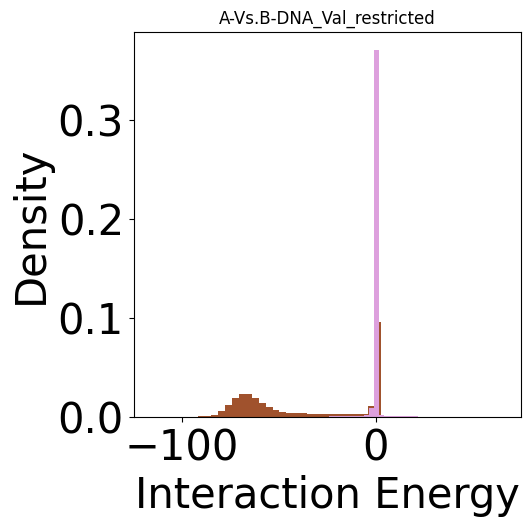

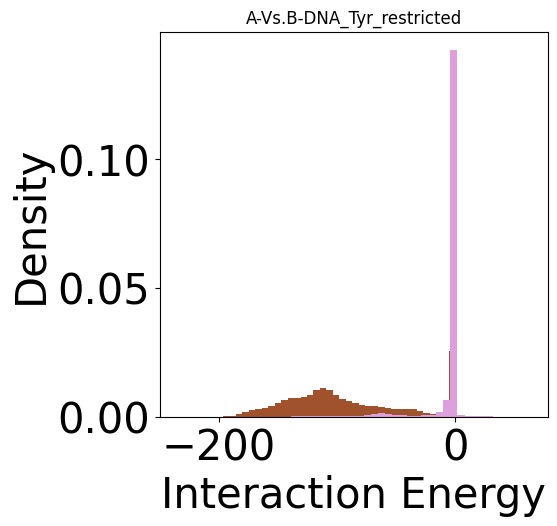

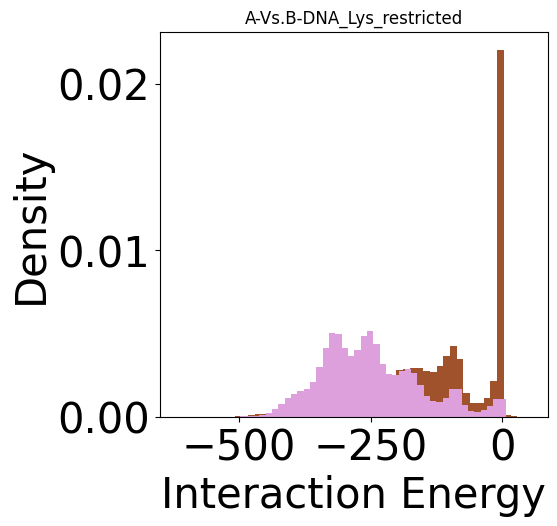

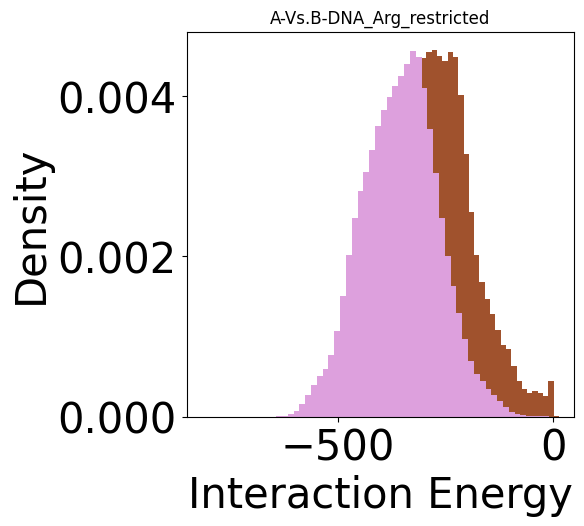

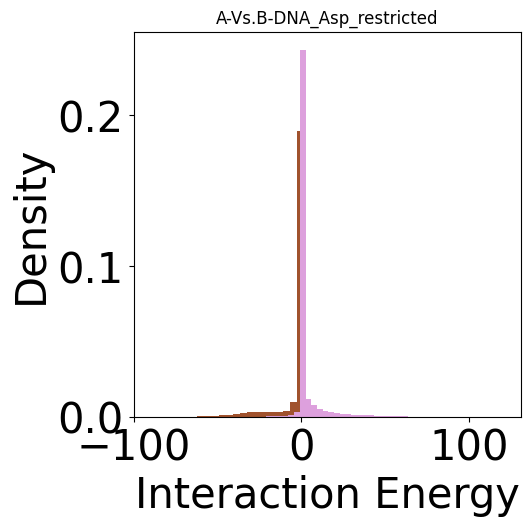

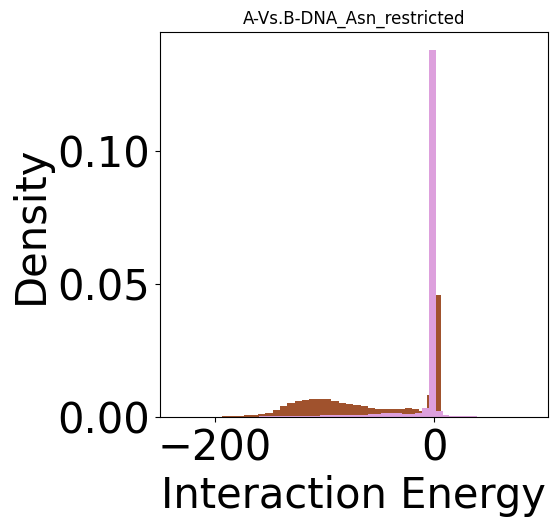

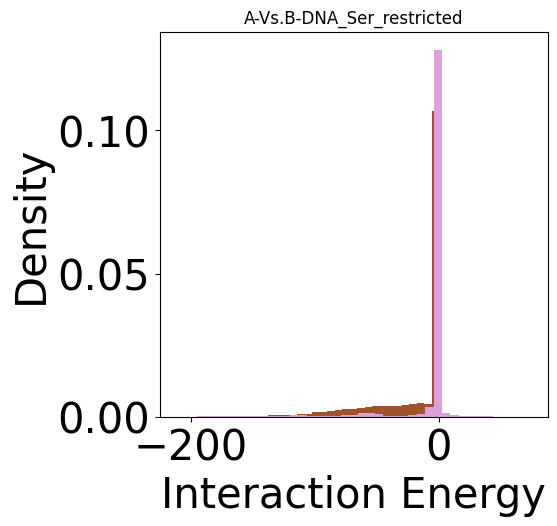

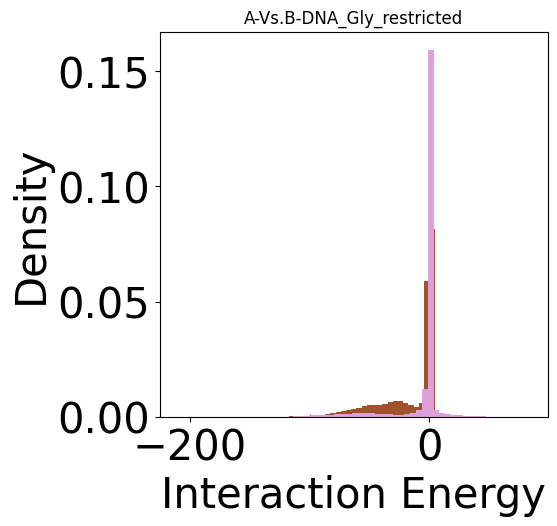

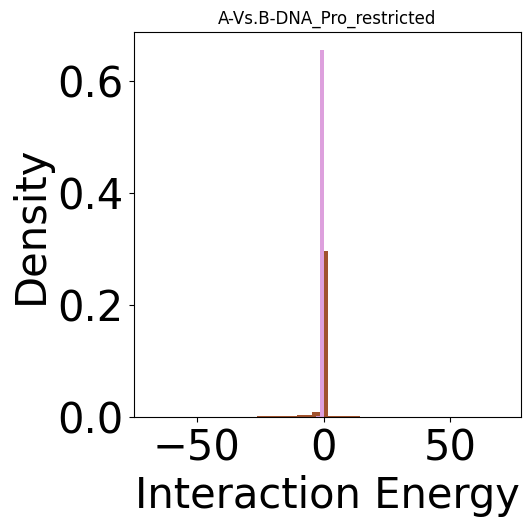

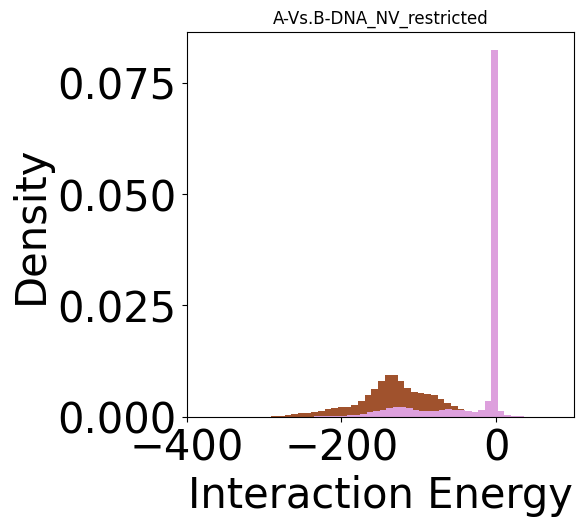

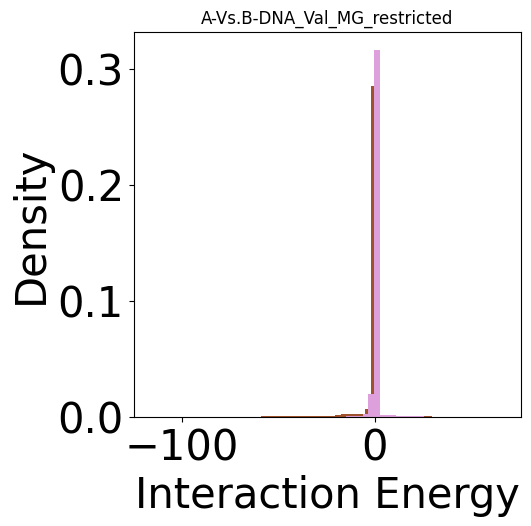

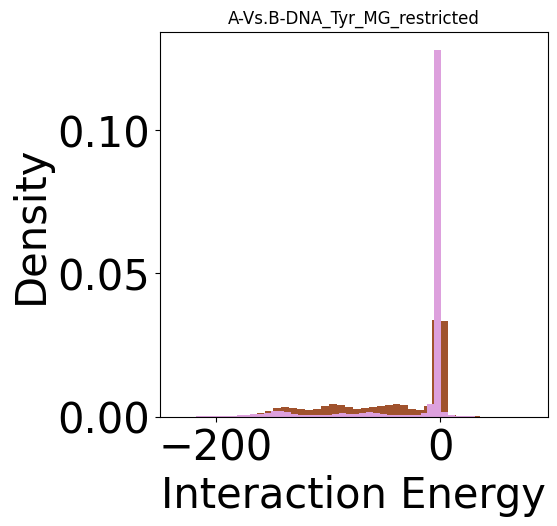

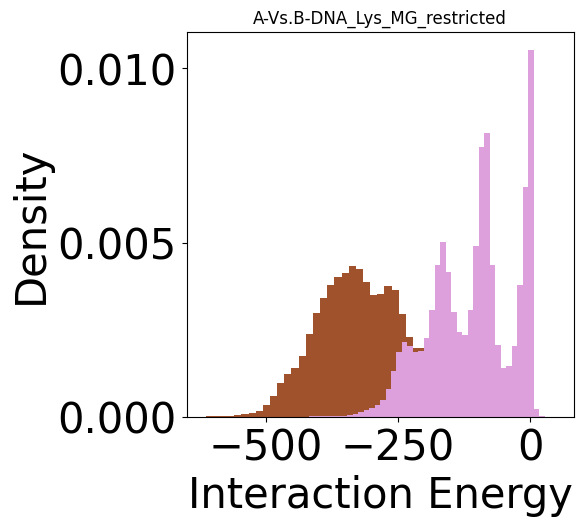

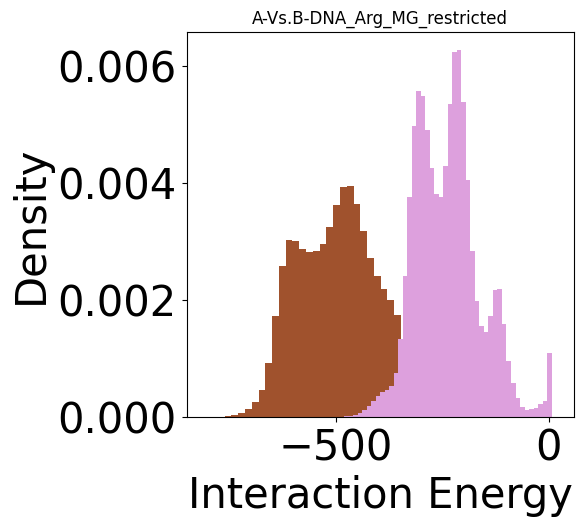

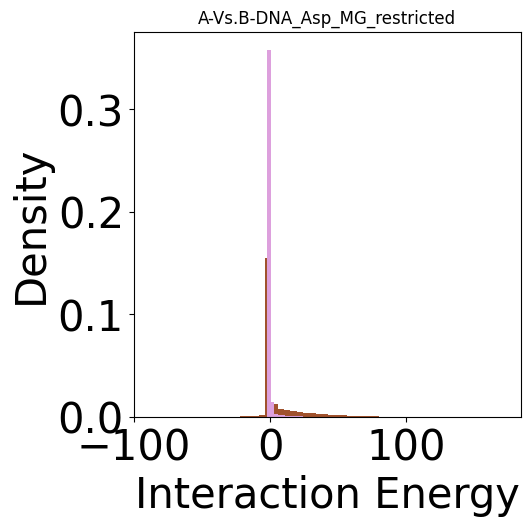

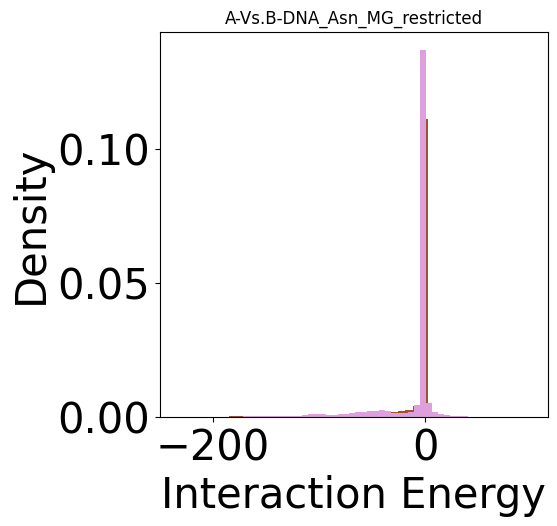

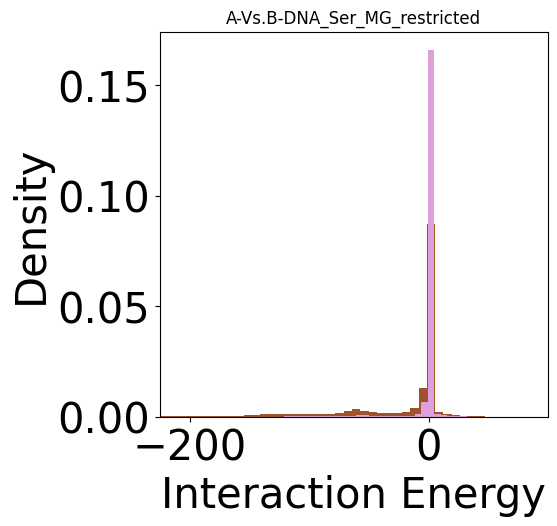

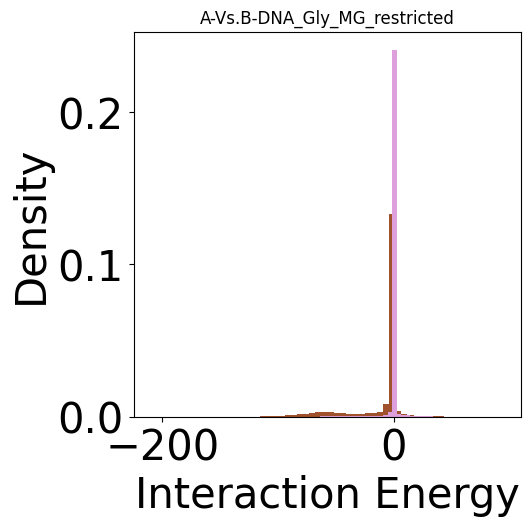

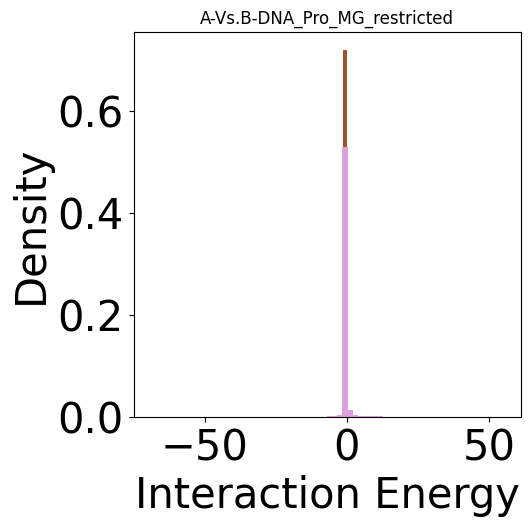

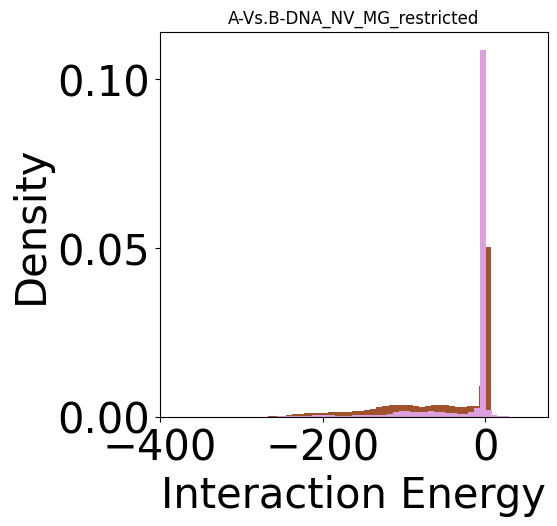

In [ ]:
#Plotting the probability density of each peptide
x_lims = [-125, -250, -650, -850, -100, -250, -225, -225, -75, -400] * 2
names = ['Val', 'Tyr', 'Lys', 'Arg', 'Asp', 'Asn', 'Ser', 'Gly', 'Pro', 'NV', 'Val_MG', 'Tyr_MG', 'Lys_MG', 'Arg_MG', 'Asp_MG', 'Asn_MG', 'Ser_MG', 'Gly_MG', 'Pro_MG', 'NV_MG']
for j in range(len(x_lims)):
    plot_density_of_significant_clusters(A_replicates_restricted, B_replicates_restricted, j, 'A-Vs.B-DNA_' + names[j], path = output_path, x_lim = x_lims[j])

/tmp/ipykernel_3827304/2983005923.py:109: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(key, xy = (mG_df_means['Value'][i_key], mG_df_means['Total Value'][i_key]), textcoords = 'offset points', ha = 'center', xytext = (10, 3), fontsize = 30)
/tmp/ipykernel_3827304/2983005923.py:128: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax = ax, data = mG_df, x = 'Peptide', order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S' ,'D', 'K', 'R'], y = 'Total Value', hue = 'DNA', fill = True, alpha = 0.8, ci = 'sd', capsize = 0.1)
/tmp/ipykernel_3827304/2983005923.py:129: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax = ax, data = MG_df, x = 'Peptide', order = ['V', 'Y', 'NV', 'G', 'P', 'N',

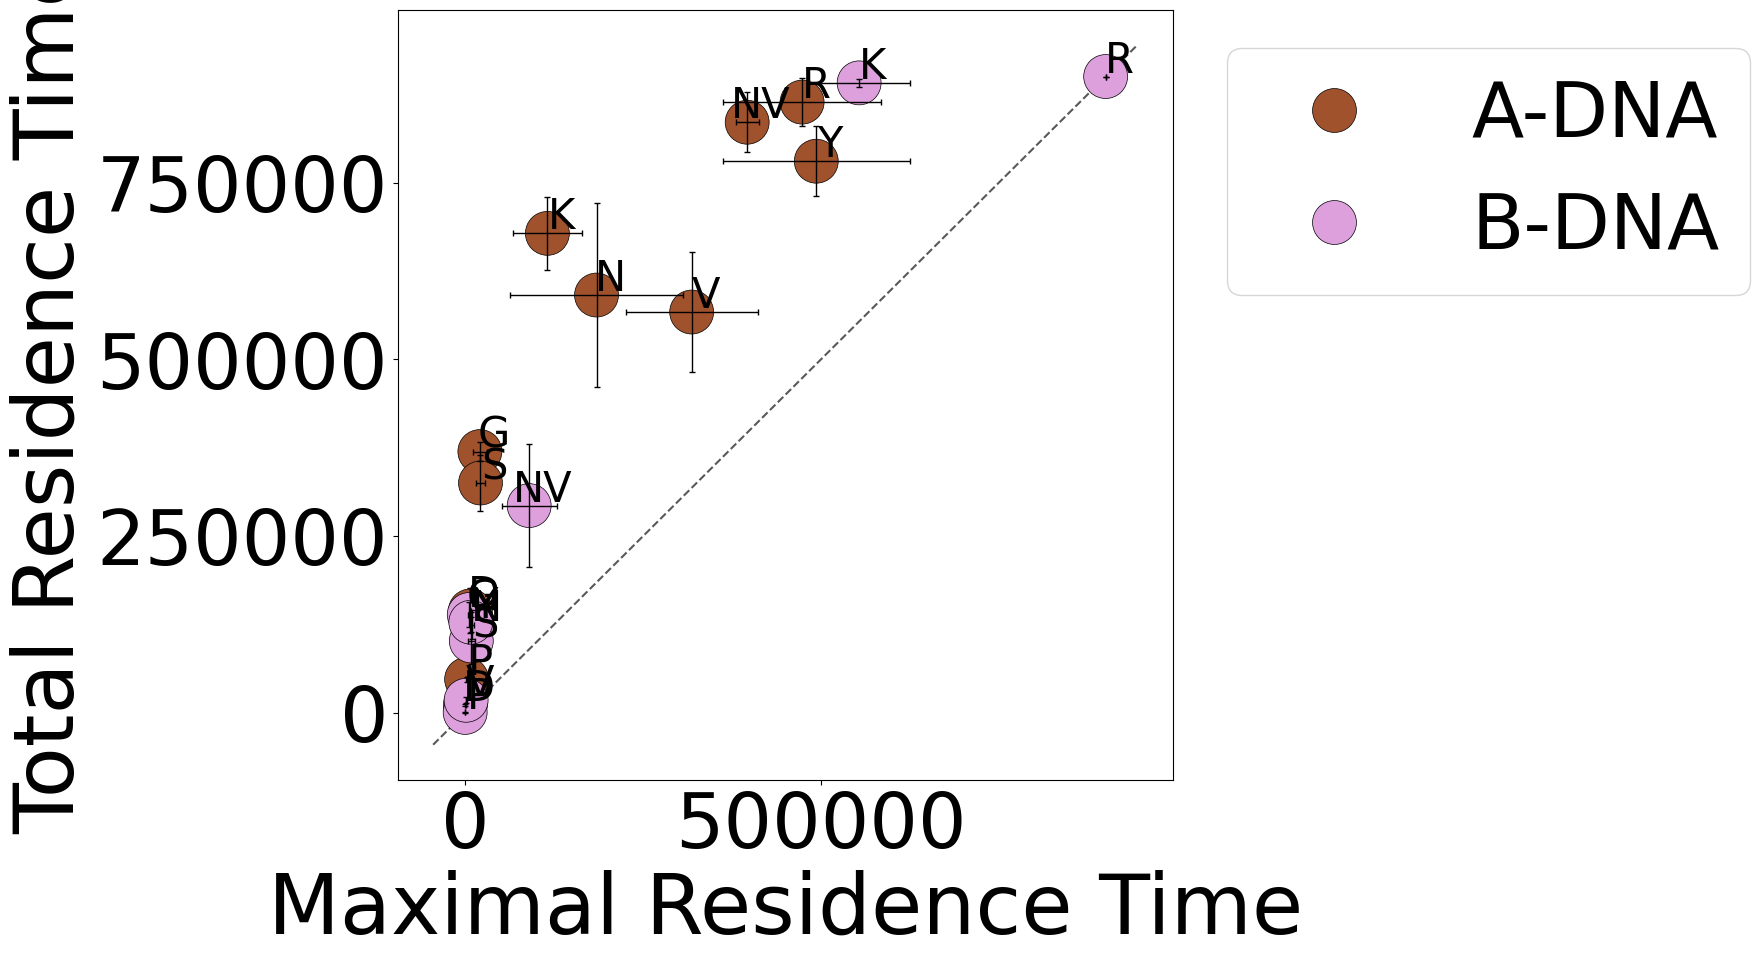

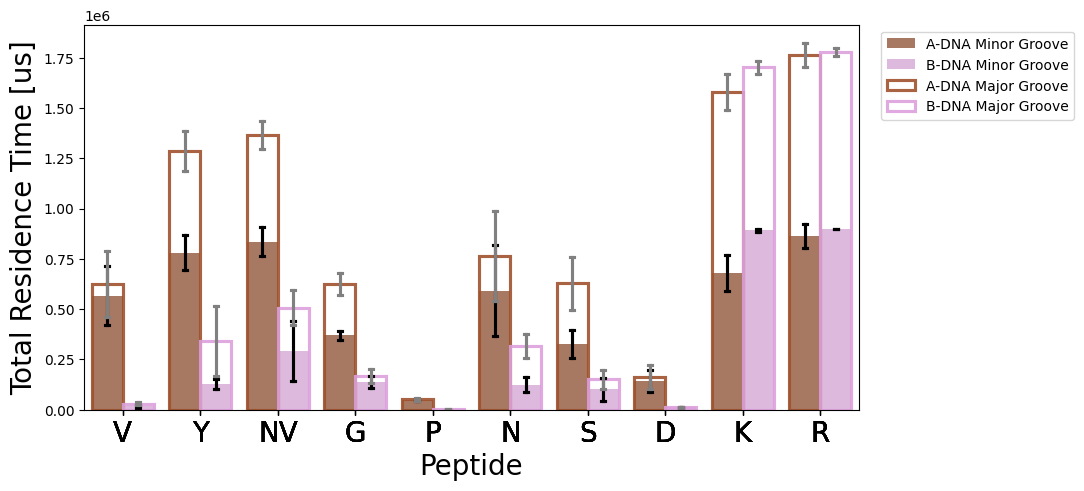

In [ ]:
#Plotting the maximal vs. total residence time scatter and the total residence time bar plot
max_rt_vs_total_rt_df_1kbt = plot_max_rt_vs_total_rt(A_significant_energy_steps_max_lengths_restricted, B_significant_energy_steps_max_lengths_restricted, A_significant_energy_steps_max_lengths_all_restricted, B_significant_energy_steps_max_lengths_all_restricted, 'Restricted', path = output_path, thres = '1KbT')

/tmp/ipykernel_3827304/2983005923.py:235: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax = ax, data = mG_df, x = 'Peptide', order = order, y = 'Value', hue = 'DNA', fill = True, alpha = 0.8, ci = 'sd', capsize = capsize)
/tmp/ipykernel_3827304/2983005923.py:236: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(ax = ax, data = MG_df, x = 'Peptide', order = order, y = MG_df['Value'] + mG_df['Value'], hue = 'DNA', fill = False, ci = 'sd', capsize = capsize, alpha = 0.9)


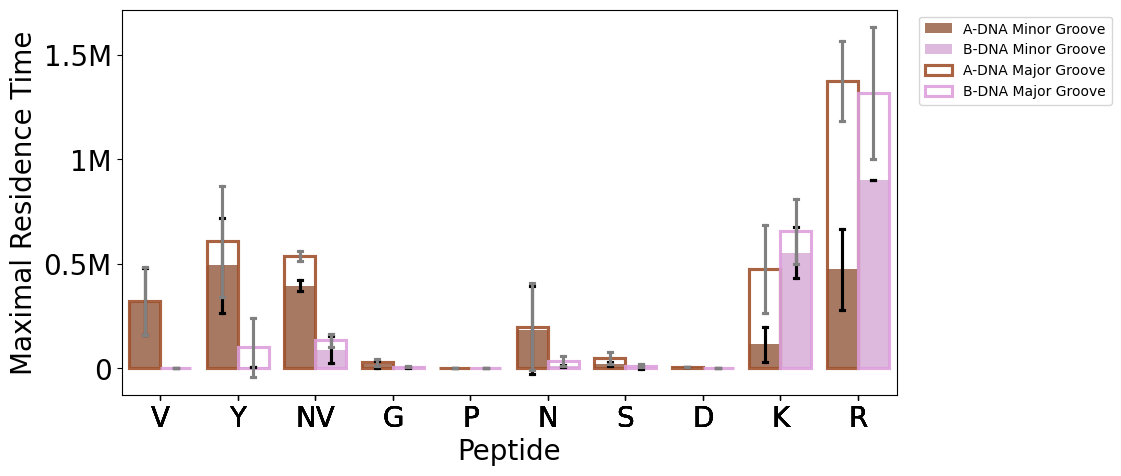

In [ ]:
#Plotting the maximal residence time bar plot
max_rt_df_1kbt = plot_maximal_length(A_significant_energy_steps_max_lengths_restricted, B_significant_energy_steps_max_lengths_restricted, 'Restricted', path = output_path, thres = '1KbT')

/tmp/ipykernel_3827304/2983005923.py:42: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.plot([((i * len(df_A.index[window_size-1:])) + x) for x in df_A.index[window_size-1:]], smoothed_ras_A, alpha = 1, c = 'sienna', label = 'A-DNA - copy ' + np.str(i + 1), rasterized = True)
/tmp/ipykernel_3827304/2983005923.py:43: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

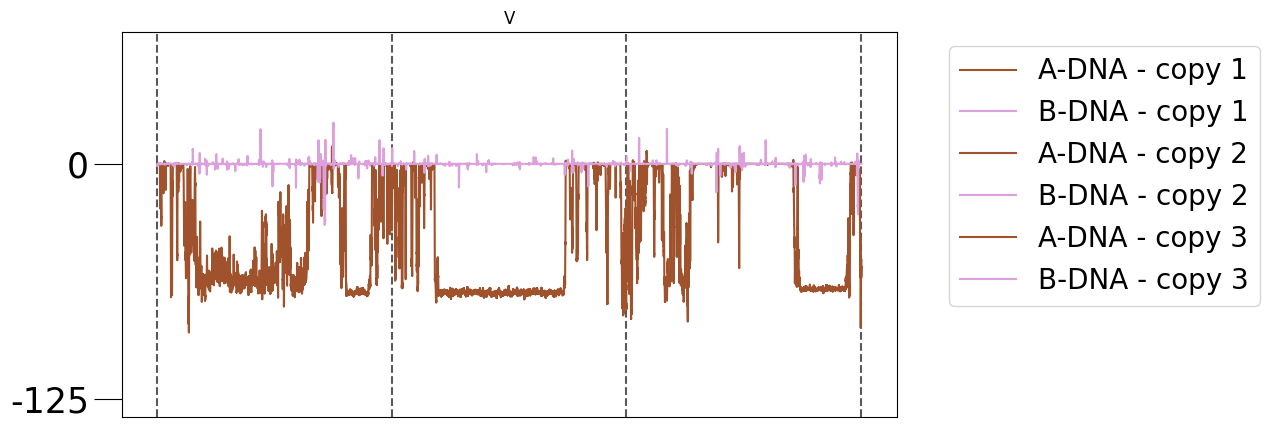

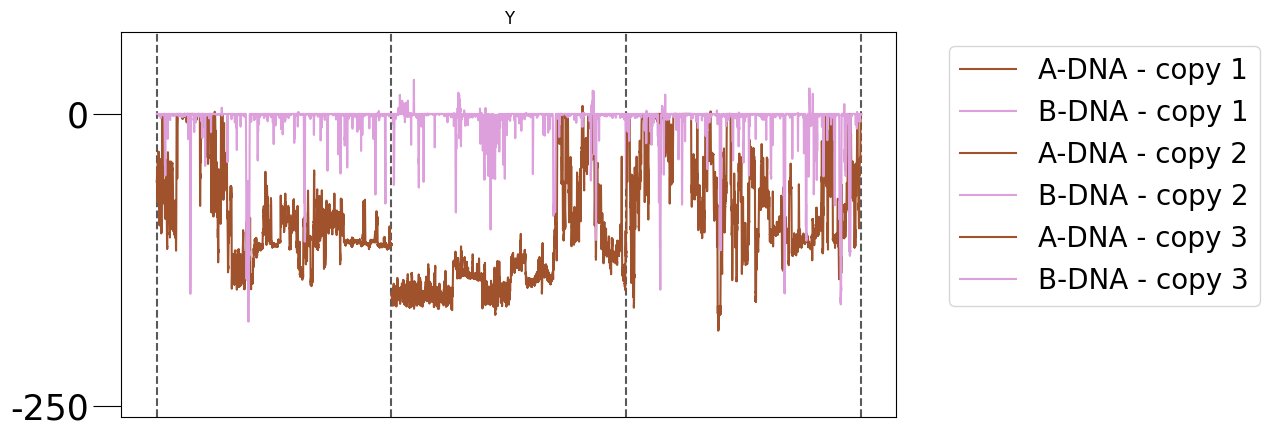

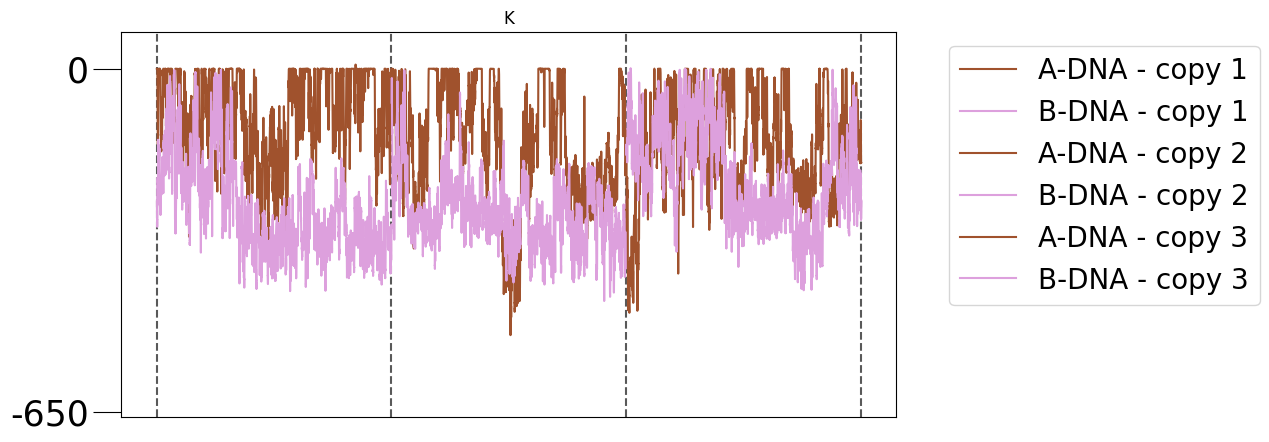

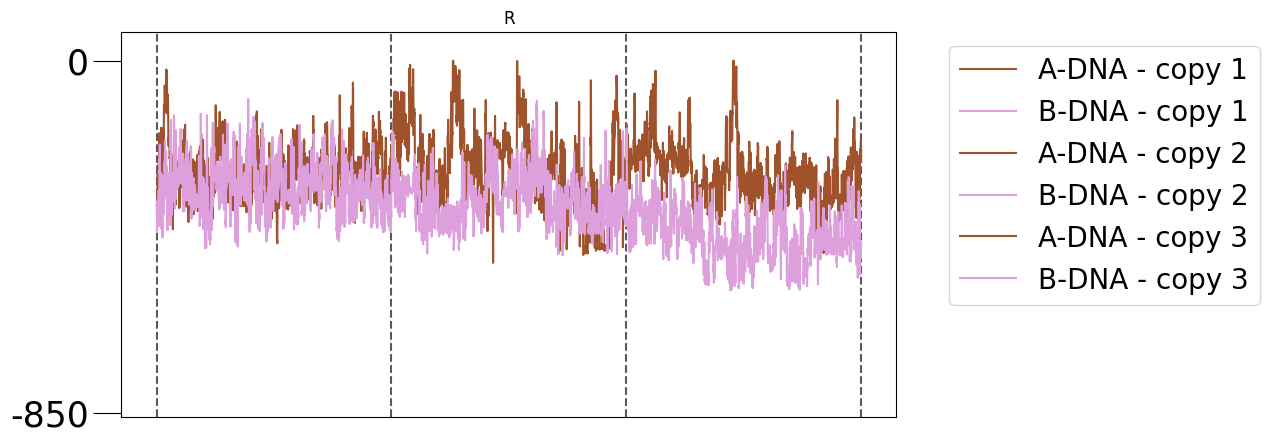

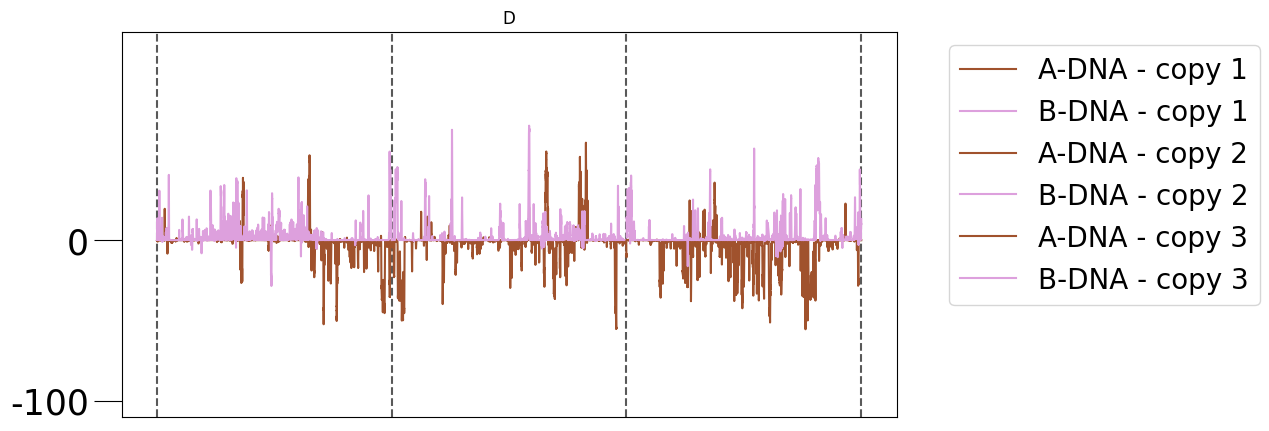

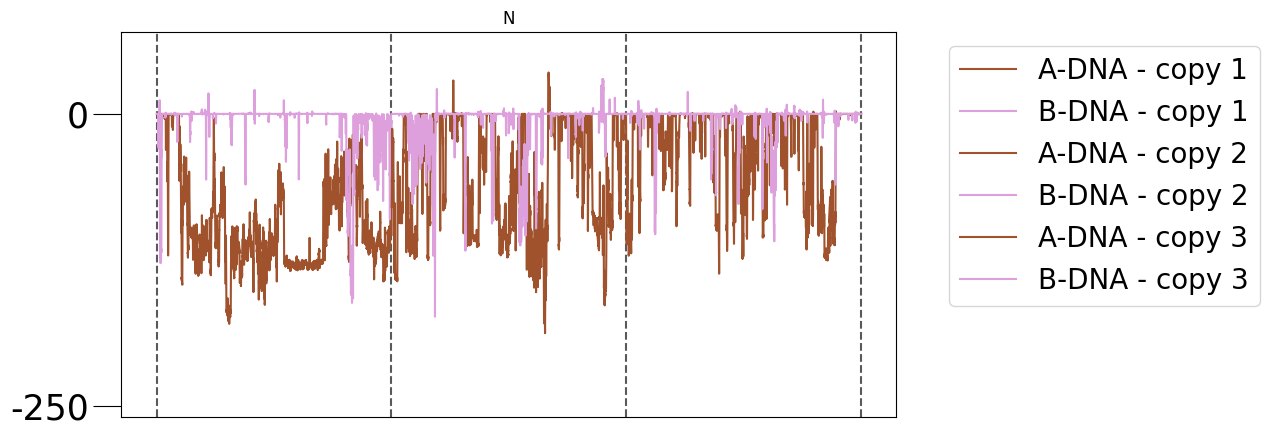

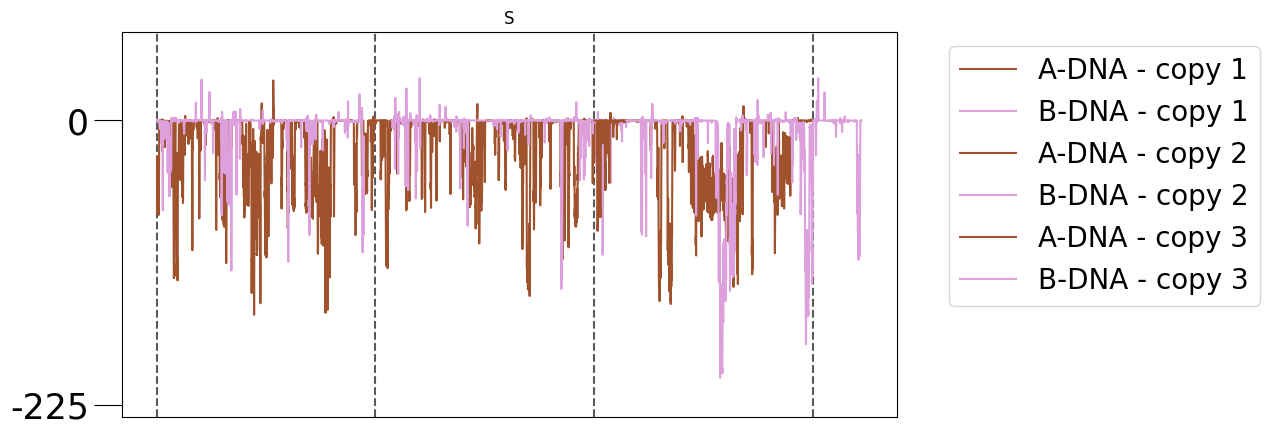

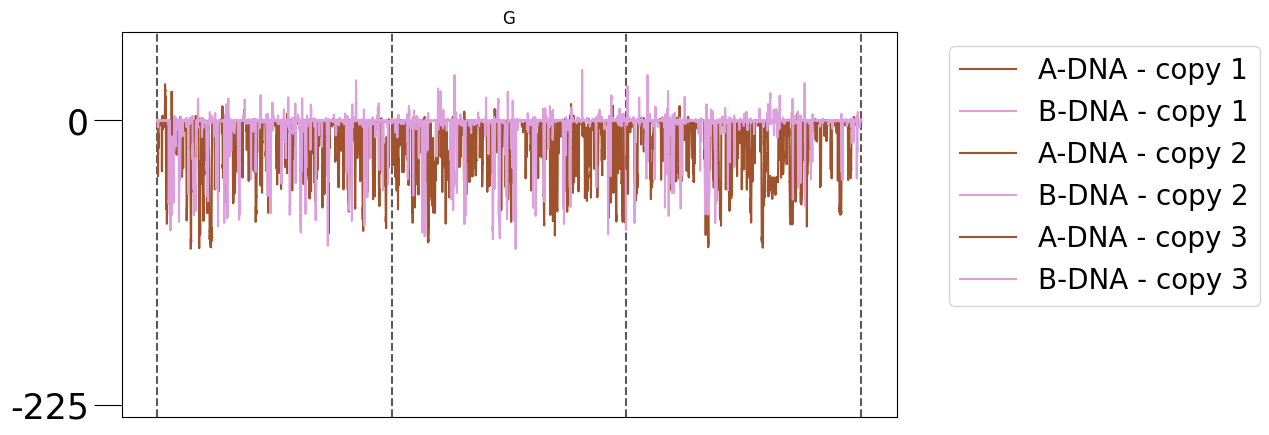

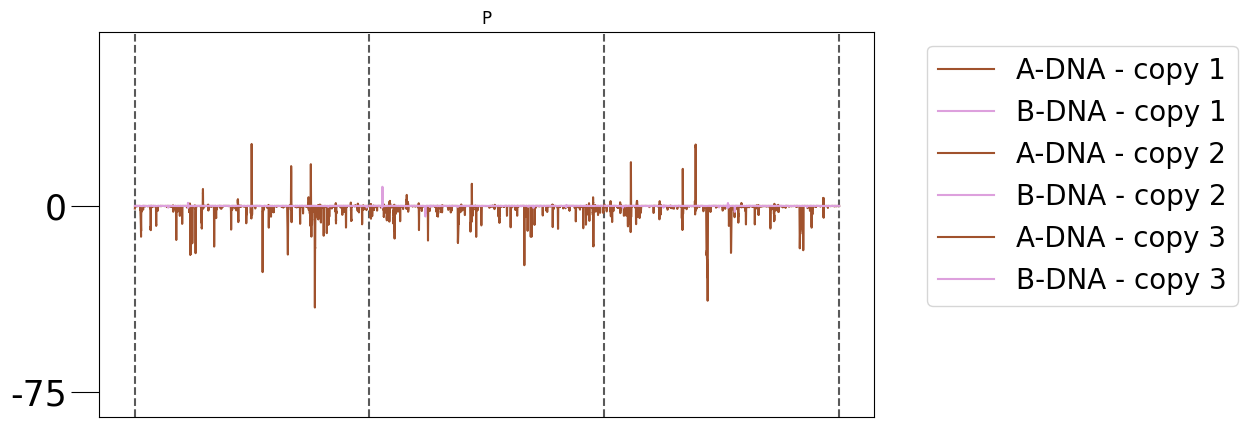

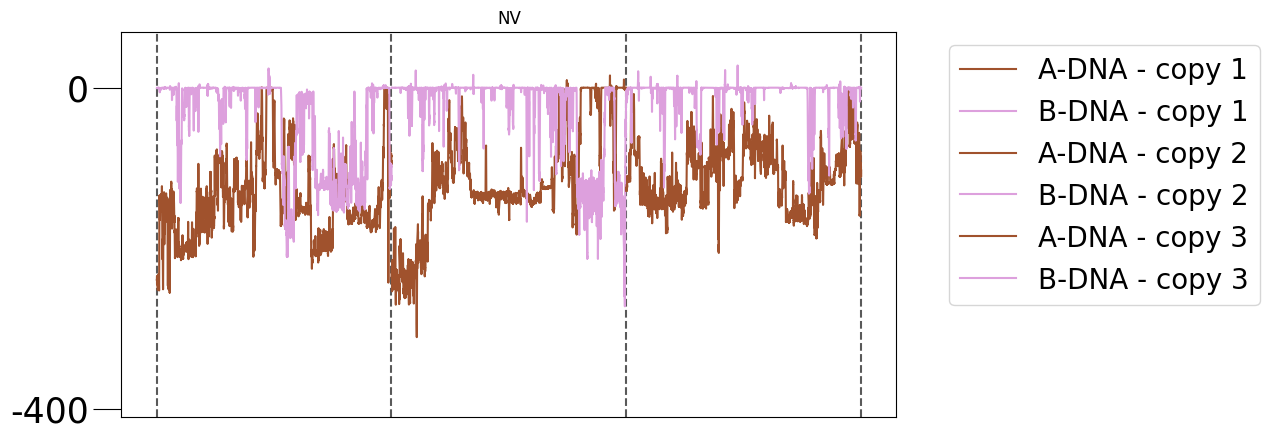

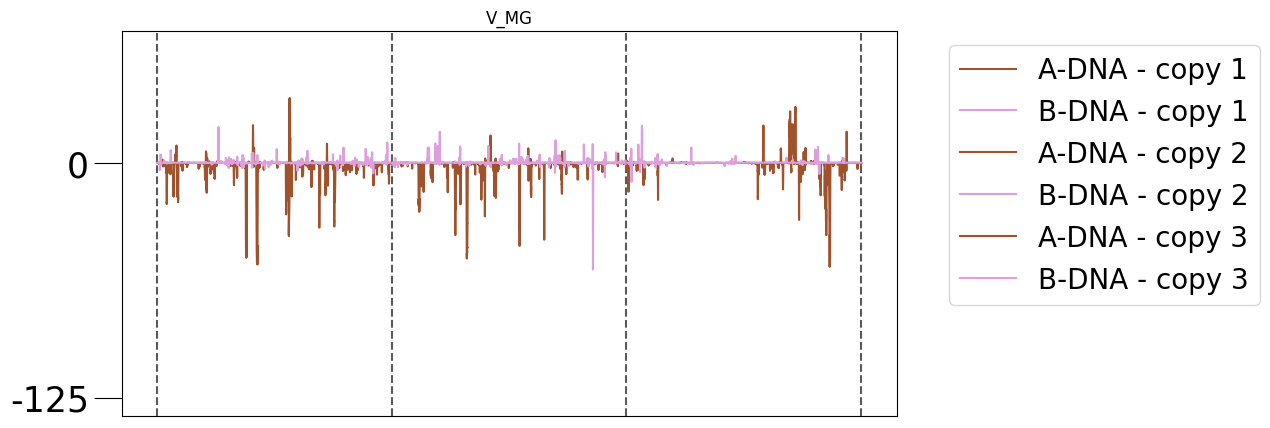

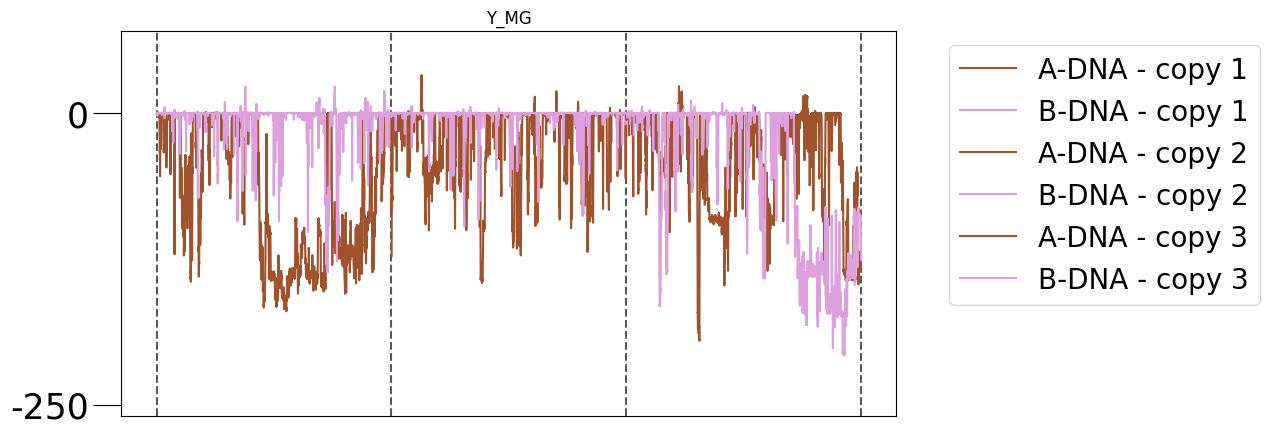

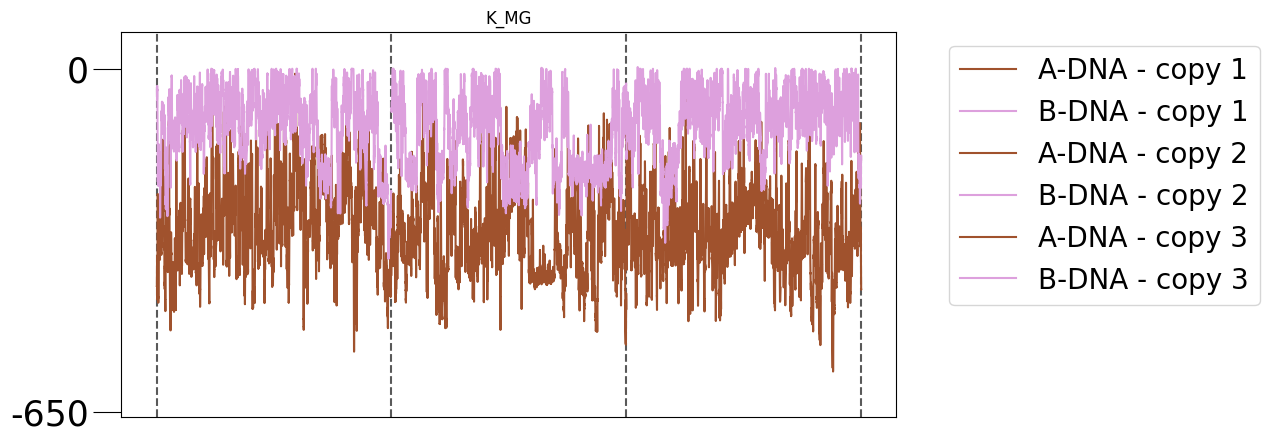

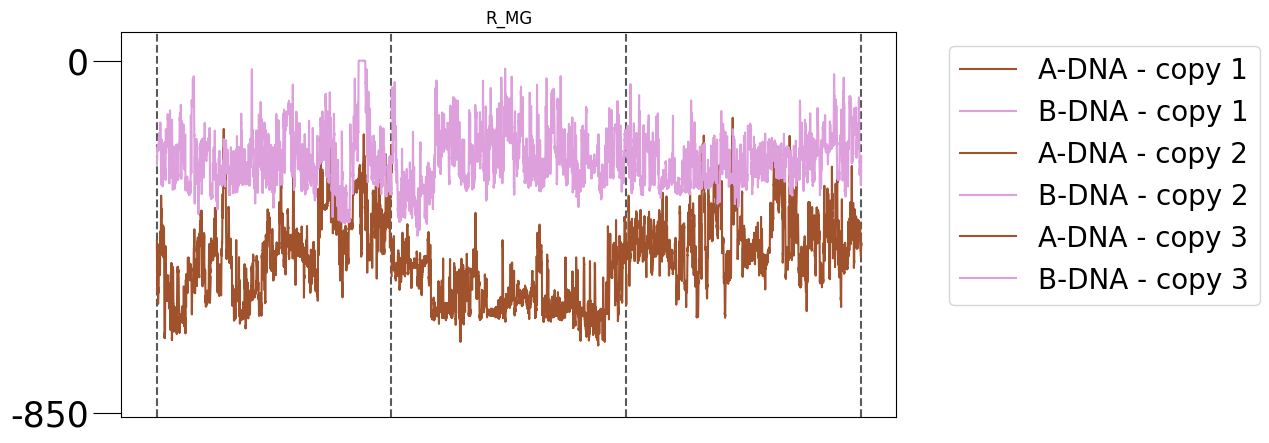

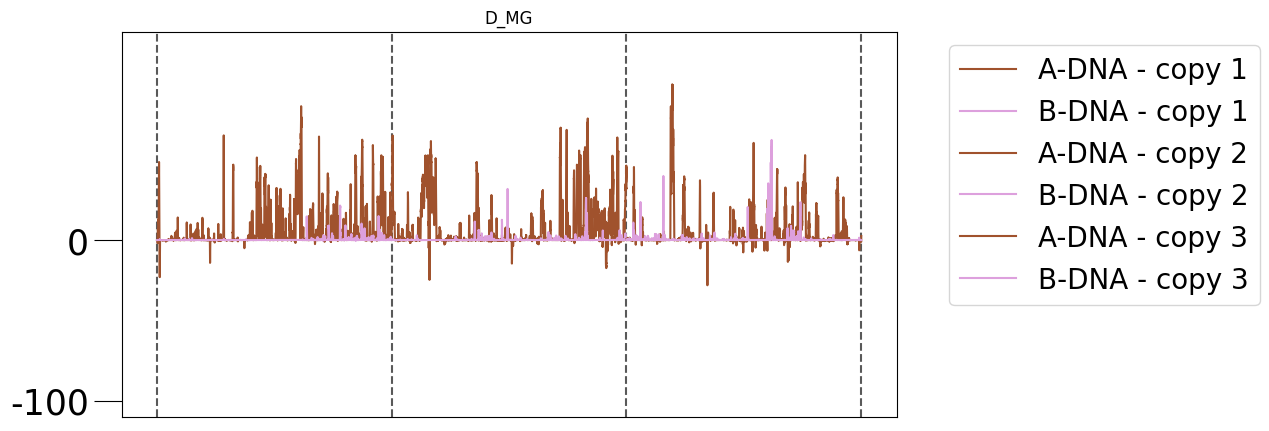

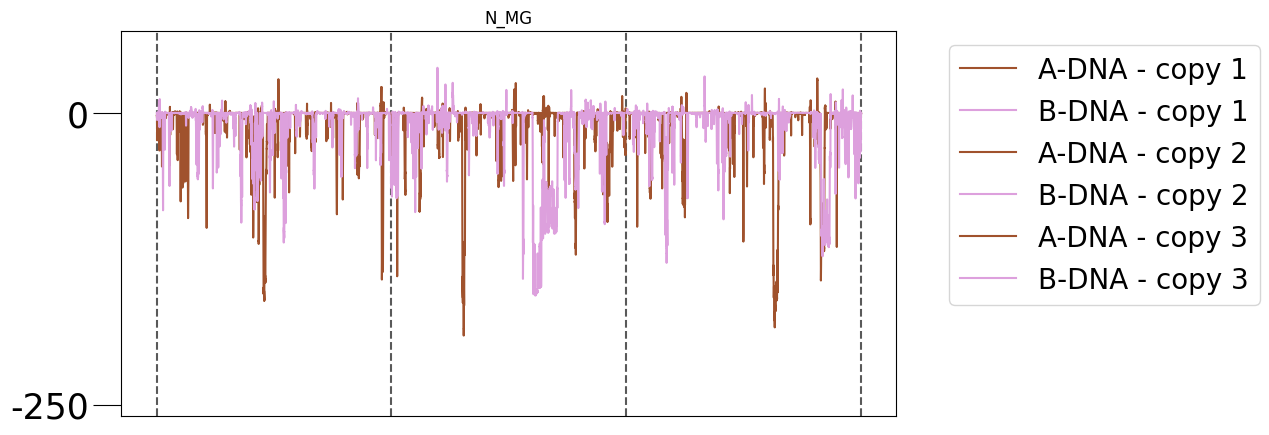

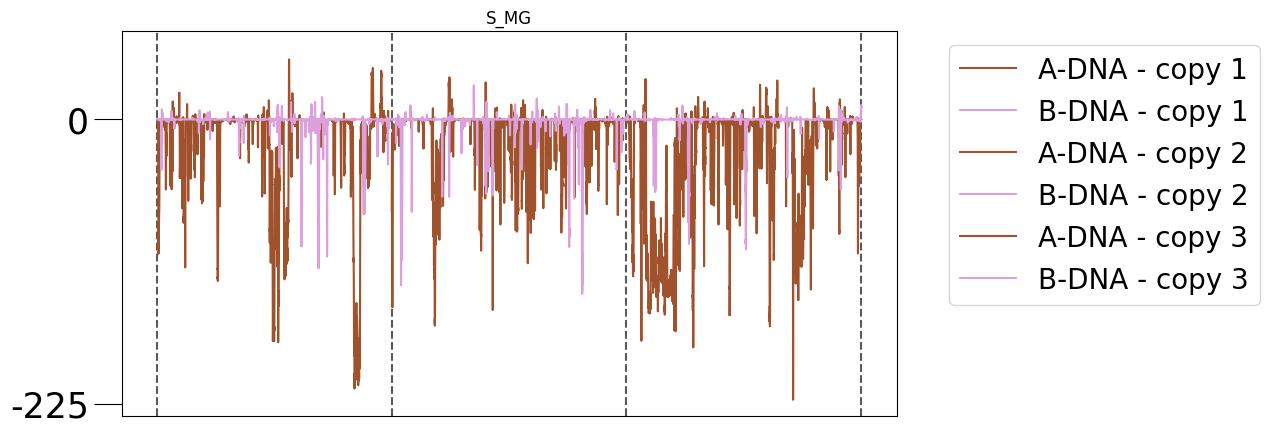

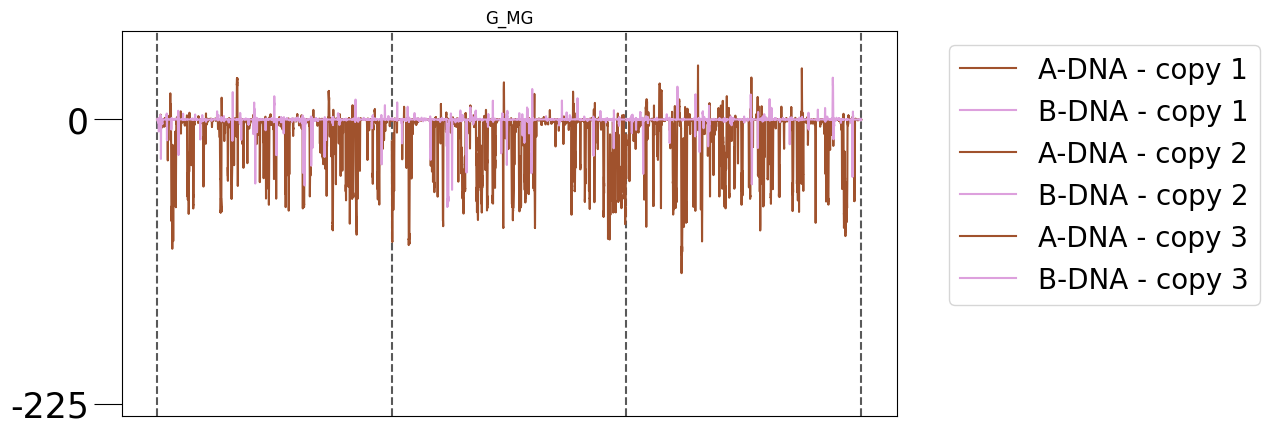

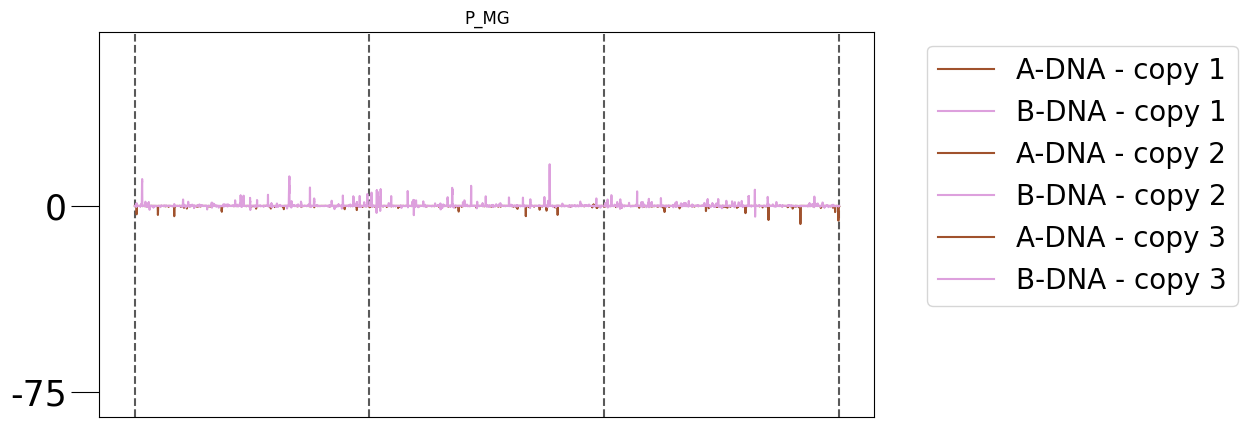

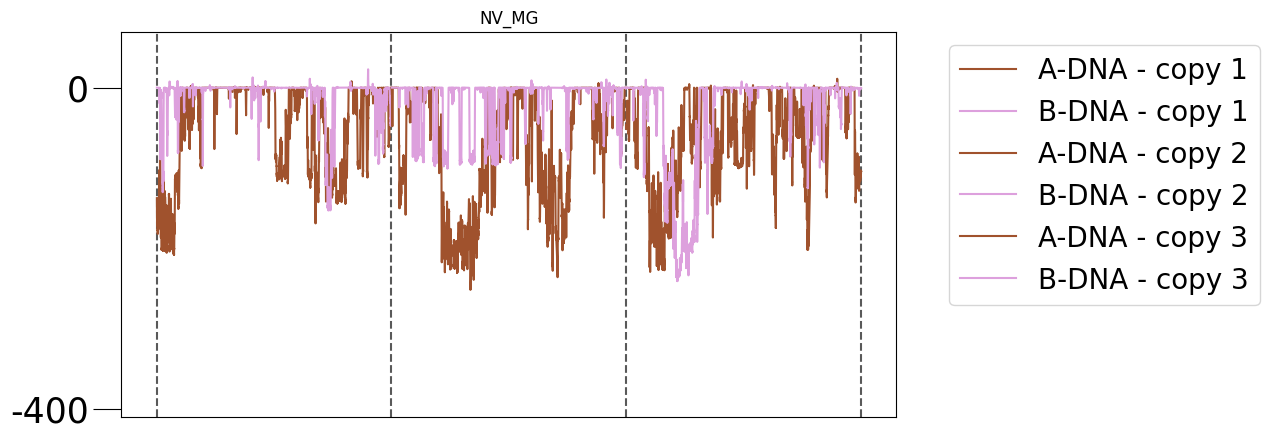

In [ ]:
#PLotting the raw (smoothed) energetic values
peptides = ['V', 'Y', 'K', 'R', 'D', 'N', 'S', 'G', 'P', 'NV', 'V_MG', 'Y_MG', 'K_MG', 'R_MG', 'D_MG', 'N_MG', 'S_MG', 'G_MG', 'P_MG', 'NV_MG']
for j in range(20):
    plot_raw_energies(A_replicates_restricted[j], B_replicates_restricted[j], j, peptides[j], window_size = 1000, path = output_path)

In [ ]:
#Generating a summing dataframe, containing relevant data for all peptide and DNA conformations and grooves

first_order_chemical_groups = ['Aliphatic', 'Aromatic', 'Basic', 'Basic', 'Acidic', 'Polar', 'Polar', 'Other', 'Other', 'Polar+Aliphatic', 'Aliphatic', 'Aromatic', 'Basic', 'Basic', 'Acidic', 'Polar', 'Polar', 'Other', 'Other', 'Polar+Aliphatic']
first_order_list = ['V', 'Y', 'K', 'R', 'D', 'N', 'S', 'G', 'P', 'NV', 'V_MG', 'Y_MG', 'K_MG', 'R_MG', 'D_MG', 'N_MG', 'S_MG', 'G_MG', 'P_MG', 'NV_MG']
conformation_A = ['A-DNA'] * len(first_order_list); conformation_B = ['B-DNA'] * len(first_order_list)

summing_A_df = pd.DataFrame(columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation'], index = [i for i in range(len(unified_means_A))])
summing_B_df = pd.DataFrame(columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation'], index = [i for i in range(len(unified_means_B))])

summing_A_df['Mean'] = unified_means_A; summing_A_df['Std'] = unified_stds_A; summing_A_df['Peptide'] = first_order_list; summing_A_df['Chemical_Group'] = first_order_chemical_groups; summing_A_df['DNA_Conformation'] = conformation_A
summing_B_df['Mean'] = unified_means_B; summing_B_df['Std'] = unified_stds_B; summing_B_df['Peptide'] = first_order_list; summing_B_df['Chemical_Group'] = first_order_chemical_groups; summing_B_df['DNA_Conformation'] = conformation_B

summing_df = pd.concat([summing_A_df, summing_B_df], axis = 1, ignore_index = True)
summing_df.columns = ['Mean_A', 'Std_A', 'Peptide_A', 'Chemical_Group_A', 'DNA_Conformation_A', 'Mean_B', 'Std_B', 'Peptide_B', 'Chemical_Group_B', 'DNA_Conformation_B']

In [ ]:
#Calculating means and standard deviations of the energetic values and storing them in the summing dataframe

indices_of_both_minor_and_major = [x for x in range(20)]
unified_dfs_A_both = []; unified_dfs_B_both = []
unified_means_A_both = []; unified_means_B_both = []
unified_stds_A_both = []; unified_stds_B_both = []
summing_df_both = summing_df.copy()
for index_both in indices_of_both_minor_and_major:
    unified_dfs_A_both.append(unified_dfs_A[index_both].copy()); unified_dfs_B_both.append(unified_dfs_B[index_both].copy())
    unified_means_A_both.append(unified_means_A[index_both]); unified_means_B_both.append(unified_means_B[index_both])
    unified_stds_A_both.append(unified_stds_A[index_both]); unified_stds_B_both.append(unified_stds_B[index_both])

reversed_general_indices = reversed([i for i in range(len(summing_df.index))])
for general_index in reversed_general_indices:
    if general_index not in indices_of_both_minor_and_major:
        summing_df_both = summing_df_both.drop(general_index, axis = 'index')
summing_df_both = summing_df_both.reset_index()

In [ ]:
#Splitting the dataframe to two separated ones - one for the minor groove and second for the major groove

summing_df_both_mG = summing_df_both.copy().iloc[0:10, :]
summing_df_both_MG = summing_df_both.copy().iloc[10:, :]

,index,Mean_A,Std_A,Peptide_A,Chemical_Group_A,DNA_Conformation_A,Mean_B,Std_B,Peptide_B,Chemical_Group_B,DNA_Conformation_B
0,0,-33.085091,31.510722,V,Aliphatic,A-DNA,-0.094073,2.690404,V,Aliphatic,B-DNA
1,1,-88.616197,51.844331,Y,Aromatic,A-DNA,-4.892492,19.203577,Y,Aromatic,B-DNA
2,2,-118.609364,107.587238,K,Basic,A-DNA,-242.350223,99.303351,K,Basic,B-DNA
3,3,-259.308627,89.509935,R,Basic,A-DNA,-348.409889,88.383395,R,Basic,B-DNA
4,4,-2.230280,10.377405,D,Acidic,A-DNA,2.996835,9.784242,D,Acidic,B-DNA
5,5,-53.809361,52.497611,N,Polar,A-DNA,-5.379790,20.138005,N,Polar,B-DNA
6,6,-18.072281,32.345293,S,Polar,A-DNA,-5.912485,24.273255,S,Polar,B-DNA
7,7,-14.813122,23.742715,G,Other,A-DNA,-5.297460,19.037240,G,Other,B-DNA
8,8,-0.527226,3.694720,P,Other,A-DNA,-0.008047,0.395545,P,Other,B-DNA
9,9,-122.593744,59.819873,NV,Polar+Aliphatic,A-DNA,-25.305713,49.295182,NV,Polar+Aliphatic,B-DNA


In [ ]:
#Reordering the summing dataframe values for easier handling throughout further analyses

summing_df_both_mG_A_Only = summing_df_both_mG.copy().iloc[:, 1:6]
summing_df_both_mG_A_Only.columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation']
summing_df_both_mG_B_Only = summing_df_both_mG.copy().iloc[:, 6:]
summing_df_both_mG_B_Only.columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation']

summing_df_both_MG_A_Only = summing_df_both_MG.copy().iloc[:, 1:6]
summing_df_both_MG_A_Only.columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation']
summing_df_both_MG_B_Only = summing_df_both_MG.copy().iloc[:, 6:]
summing_df_both_MG_B_Only.columns = ['Mean', 'Std', 'Peptide', 'Chemical_Group', 'DNA_Conformation']

summing_df_both_mG_A_And_B = pd.concat([summing_df_both_mG_A_Only, summing_df_both_mG_B_Only], axis = 0, ignore_index = True)
summing_df_both_MG_A_And_B = pd.concat([summing_df_both_MG_A_Only, summing_df_both_MG_B_Only], axis = 0, ignore_index = True)

,Mean,Std,Peptide,Chemical_Group,DNA_Conformation
0,-33.085091,31.510722,V,Aliphatic,A-DNA
1,-88.616197,51.844331,Y,Aromatic,A-DNA
2,-118.609364,107.587238,K,Basic,A-DNA
3,-259.308627,89.509935,R,Basic,A-DNA
4,-2.230280,10.377405,D,Acidic,A-DNA
5,-53.809361,52.497611,N,Polar,A-DNA
6,-18.072281,32.345293,S,Polar,A-DNA
7,-14.813122,23.742715,G,Other,A-DNA
8,-0.527226,3.694720,P,Other,A-DNA
9,-122.593744,59.819873,NV,Polar+Aliphatic,A-DNA


In [ ]:
#Adding a hydrophobicity score for the minor groove dataframe

hydro_score = {'V': 'Hyd', 'Y': 'Hyd', 'K': 'PC', 'R': 'PC', 'D': 'NC', 'N': 'Pol', 'S': 'Pol', 'G': 'Non-Pol', 'P': 'Non-Pol', 'NV': 'Pol+Hyd'}

summing_df_both_mG_A_And_B['Hydro_Score'] = 0
hydro_score_vec = []
for i_r, row in summing_df_both_mG_A_And_B.iterrows():
    hydro_score_vec.append(hydro_score[row.values[2]])
summing_df_both_mG_A_And_B['Hydro_Score'] = hydro_score_vec

,Mean,Std,Peptide,Chemical_Group,DNA_Conformation,Hydro_Score
0,-33.085091,31.510722,V,Aliphatic,A-DNA,Hyd
1,-88.616197,51.844331,Y,Aromatic,A-DNA,Hyd
2,-118.609364,107.587238,K,Basic,A-DNA,PC
3,-259.308627,89.509935,R,Basic,A-DNA,PC
4,-2.230280,10.377405,D,Acidic,A-DNA,NC
5,-53.809361,52.497611,N,Polar,A-DNA,Pol
6,-18.072281,32.345293,S,Polar,A-DNA,Pol
7,-14.813122,23.742715,G,Other,A-DNA,Non-Pol
8,-0.527226,3.694720,P,Other,A-DNA,Non-Pol
9,-122.593744,59.819873,NV,Polar+Aliphatic,A-DNA,Pol+Hyd


In [ ]:
#Adding a hydrophobicity score for the major groove dataframe

hydro_score_MG = {'V_MG': 'Hyd', 'Y_MG': 'Hyd', 'K_MG': 'PC', 'R_MG': 'PC', 'D_MG': 'NC', 'N_MG': 'Pol', 'S_MG': 'Pol', 'G_MG': 'Non-Pol', 'P_MG': 'Non-Pol', 'NV_MG': 'Pol+Hyd'}

summing_df_both_MG_A_And_B['Hydro_Score'] = 0
hydro_score_vec_MG = []
for i_r, row in summing_df_both_MG_A_And_B.iterrows():
    hydro_score_vec_MG.append(hydro_score_MG[row.values[2]])
summing_df_both_MG_A_And_B['Hydro_Score'] = hydro_score_vec_MG

,Mean,Std,Peptide,Chemical_Group,DNA_Conformation,Hydro_Score
0,-0.930834,6.002715,V_MG,Aliphatic,A-DNA,Hyd
1,-40.799239,51.195862,Y_MG,Aromatic,A-DNA,Hyd
2,-301.092736,98.943510,K_MG,Basic,A-DNA,PC
3,-481.068690,105.665514,R_MG,Basic,A-DNA,PC
4,5.346156,13.752904,D_MG,Acidic,A-DNA,NC
5,-11.133451,33.435595,N_MG,Polar,A-DNA,Pol
6,-19.197665,40.944596,S_MG,Polar,A-DNA,Pol
7,-9.981228,23.879549,G_MG,Other,A-DNA,Non-Pol
8,-0.043827,0.656053,P_MG,Other,A-DNA,Non-Pol
9,-56.517702,67.709104,NV_MG,Polar+Aliphatic,A-DNA,Pol+Hyd


In [ ]:
#Sorting the summing unified dataframe based on the hydrophobicity score

sorter = ['Hyd', 'Pol+Hyd', 'Non-Pol', 'Pol', 'NC', 'PC']
sorterIndex = dict(zip(sorter, range(len(sorter))))
summing_df_both_mG_A_And_B['Hydro_Score_Rank'] = summing_df_both_mG_A_And_B['Hydro_Score'].map(sorterIndex)
summing_df_both_MG_A_And_B['Hydro_Score_Rank'] = summing_df_both_MG_A_And_B['Hydro_Score'].map(sorterIndex)

sorted_by_Hyd_Score_summing_df_both_mG_A_And_B = summing_df_both_mG_A_And_B.copy().sort_values(by = 'Hydro_Score_Rank', ascending = False, ignore_index = True)
sorted_by_Hyd_Score_summing_df_both_MG_A_And_B = summing_df_both_MG_A_And_B.copy().sort_values(by = 'Hydro_Score_Rank', ascending = False, ignore_index = True)

,Mean,Std,Peptide,Chemical_Group,DNA_Conformation,Hydro_Score,Hydro_Score_Rank
0,-301.092736,98.943510,K_MG,Basic,A-DNA,PC,5
1,-481.068690,105.665514,R_MG,Basic,A-DNA,PC,5
2,-106.328848,77.781217,K_MG,Basic,B-DNA,PC,5
3,-232.253483,78.088322,R_MG,Basic,B-DNA,PC,5
4,5.346156,13.752904,D_MG,Acidic,A-DNA,NC,4
5,0.422608,3.192574,D_MG,Acidic,B-DNA,NC,4
6,-1.840523,12.683757,S_MG,Polar,B-DNA,Pol,3
7,-11.133451,33.435595,N_MG,Polar,A-DNA,Pol,3
8,-19.197665,40.944596,S_MG,Polar,A-DNA,Pol,3
9,-11.249279,29.953059,N_MG,Polar,B-DNA,Pol,3


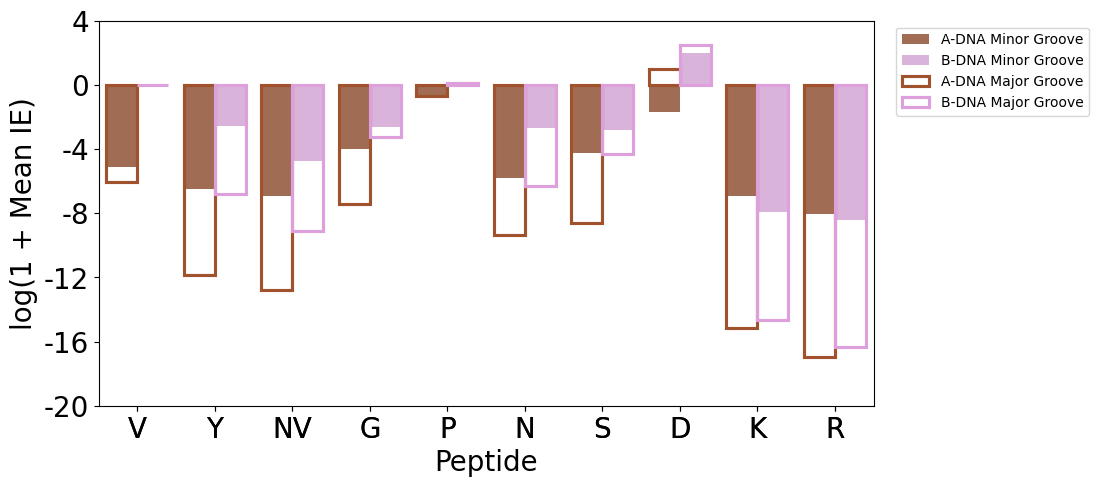

In [ ]:
#Plotting the mean energetic values for each peptide

#Generating a new figure
fig, ax = plt.subplots(figsize = (10, 5))

#Defining parameters for drawing
colors = ['sienna', 'plum']
sns.set_palette(sns.color_palette(colors))
plt.rcParams['pdf.fonttype'] = 42

#Plotting the mean energetic values
sns.barplot(ax = ax, data = sorted_by_Hyd_Score_summing_df_both_mG_A_And_B, x = 'Peptide', order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S', 'D', 'K', 'R'], y = (np.log2(1 + np.abs(sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean']))) * ((np.abs(sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean'])) / (sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean'])), fill = True, hue = sorted_by_Hyd_Score_summing_df_both_mG_A_And_B[['DNA_Conformation']].apply(tuple, axis = 1), alpha = 0.875)#, palette = 'RdBu')#, legend = False)
sns.barplot(ax = ax, data = sorted_by_Hyd_Score_summing_df_both_MG_A_And_B, x = sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Peptide'], order = ['V', 'Y', 'NV', 'G', 'P', 'N', 'S', 'D', 'K', 'R'], y = (np.log2(1 + np.abs(sorted_by_Hyd_Score_summing_df_both_MG_A_And_B['Mean']))) * ((np.abs(sorted_by_Hyd_Score_summing_df_both_MG_A_And_B['Mean'])) / (sorted_by_Hyd_Score_summing_df_both_MG_A_And_B['Mean'])) + (np.log2(1 + np.abs(sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean']))) * ((np.abs(sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean'])) / (sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Mean'])), fill = False, hue = sorted_by_Hyd_Score_summing_df_both_MG_A_And_B[['DNA_Conformation']].apply(tuple, axis = 1), alpha = 1)

#Defining parameters for drawing
plt.legend(bbox_to_anchor = (1.02, 1))
ax.set_ylabel('log(1 + Mean IE)', size = 20)
ax.set_xlabel('Peptide', size = 20)
ax.set_yticks(ticks = [4, 0, -4, -8, -12, -16, -20], labels = [4, 0, -4, -8, -12, -16, -20], fontsize = 20)
ax.set_xticks(ticks = sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Peptide'], labels = sorted_by_Hyd_Score_summing_df_both_mG_A_And_B['Peptide'], fontsize = 20)
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor = (1.02, 1), handles = handles, labels = ['A-DNA Minor Groove', 'B-DNA Minor Groove', 'A-DNA Major Groove', 'B-DNA Major Groove'])

#Saving the figure
fig.savefig(output_path + 'Mean_Energy_Conformations_Grooves_FOR_UPLOAD.pdf', format = 'pdf')